In [2]:
#All Libraries used in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.signal import find_peaks
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#Reading the data from the csv files
hour3 = pd.read_csv('1_6pm - 9pm.csv')
hour6 = pd.read_csv('2_9pm - 12am.csv')
hour9 = pd.read_csv('3_12am - 3am.csv')
hour12 = pd.read_csv('4_3am - 6am.csv')
hour15 = pd.read_csv('5_6am - 9am.csv')
hour18 = pd.read_csv('6_9am - 12pm.csv')
hour21 = pd.read_csv('7_12pm - 3pm.csv')
hour24 = pd.read_csv('8_3pm - 6pm.csv')

hours = [hour3, hour6, hour9, hour12, hour15, hour18, hour21, hour24]

In [4]:
#Cleaning the data
for hour in hours:
    for column in hour.columns[1:]:
        hour[column] = pd.Series(hour[column]).dropna()

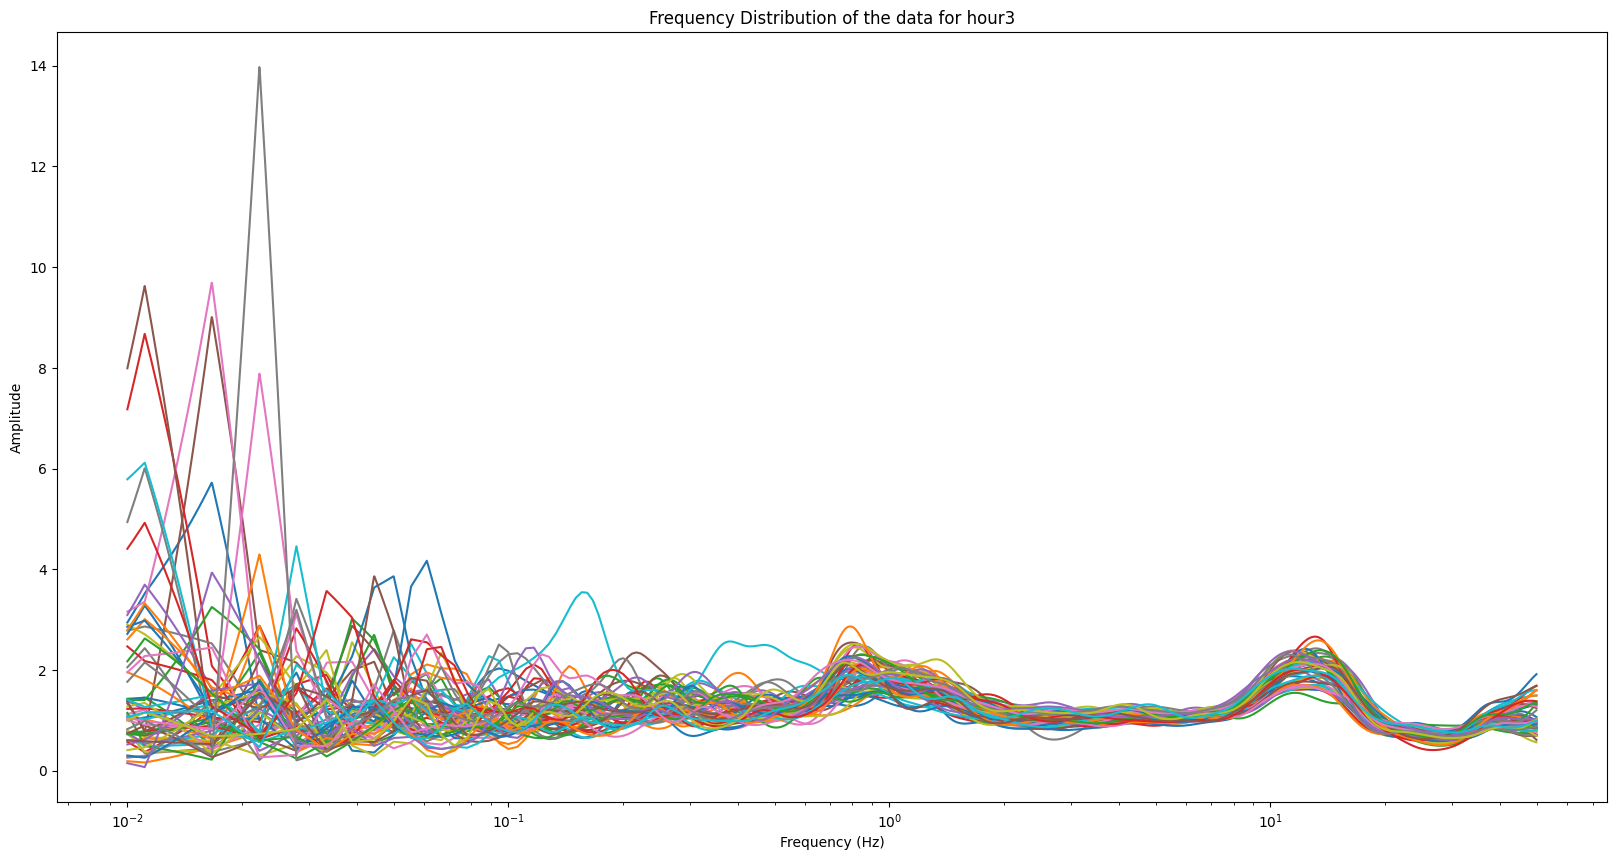

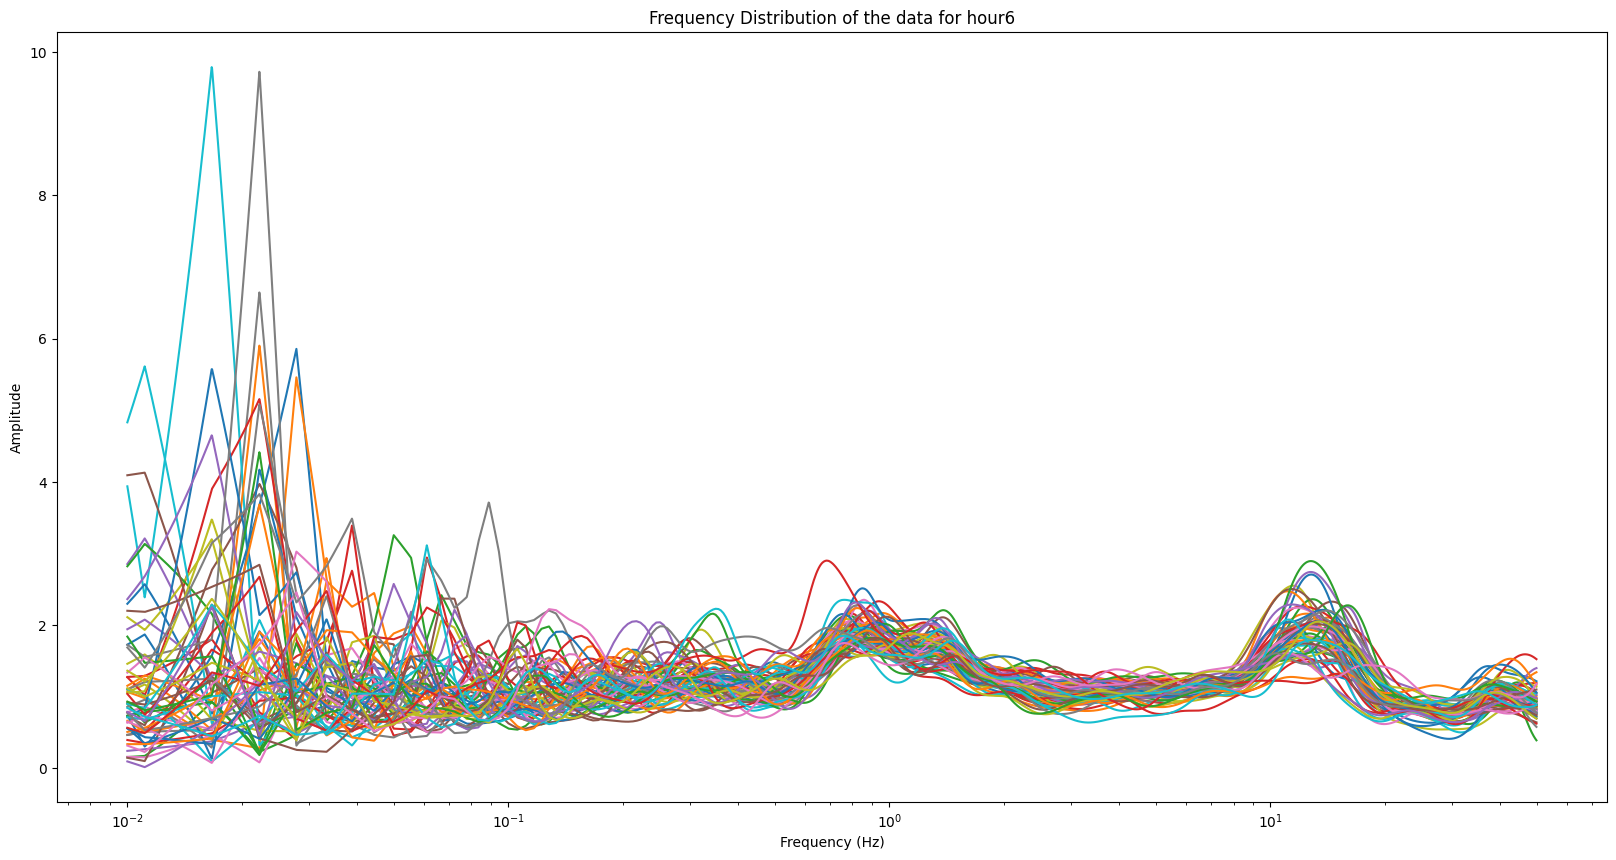

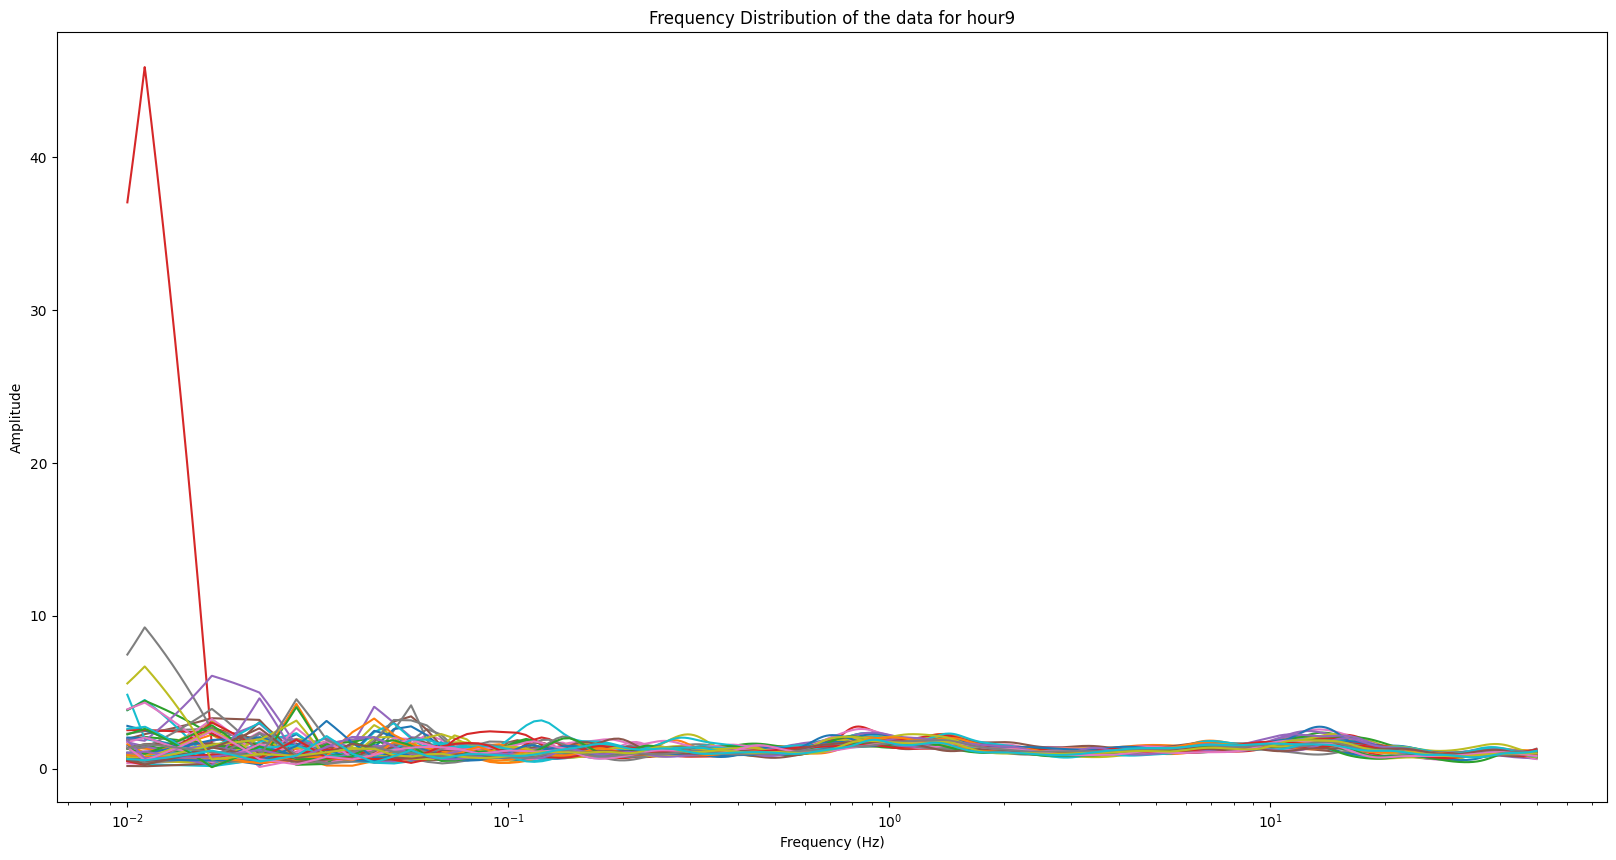

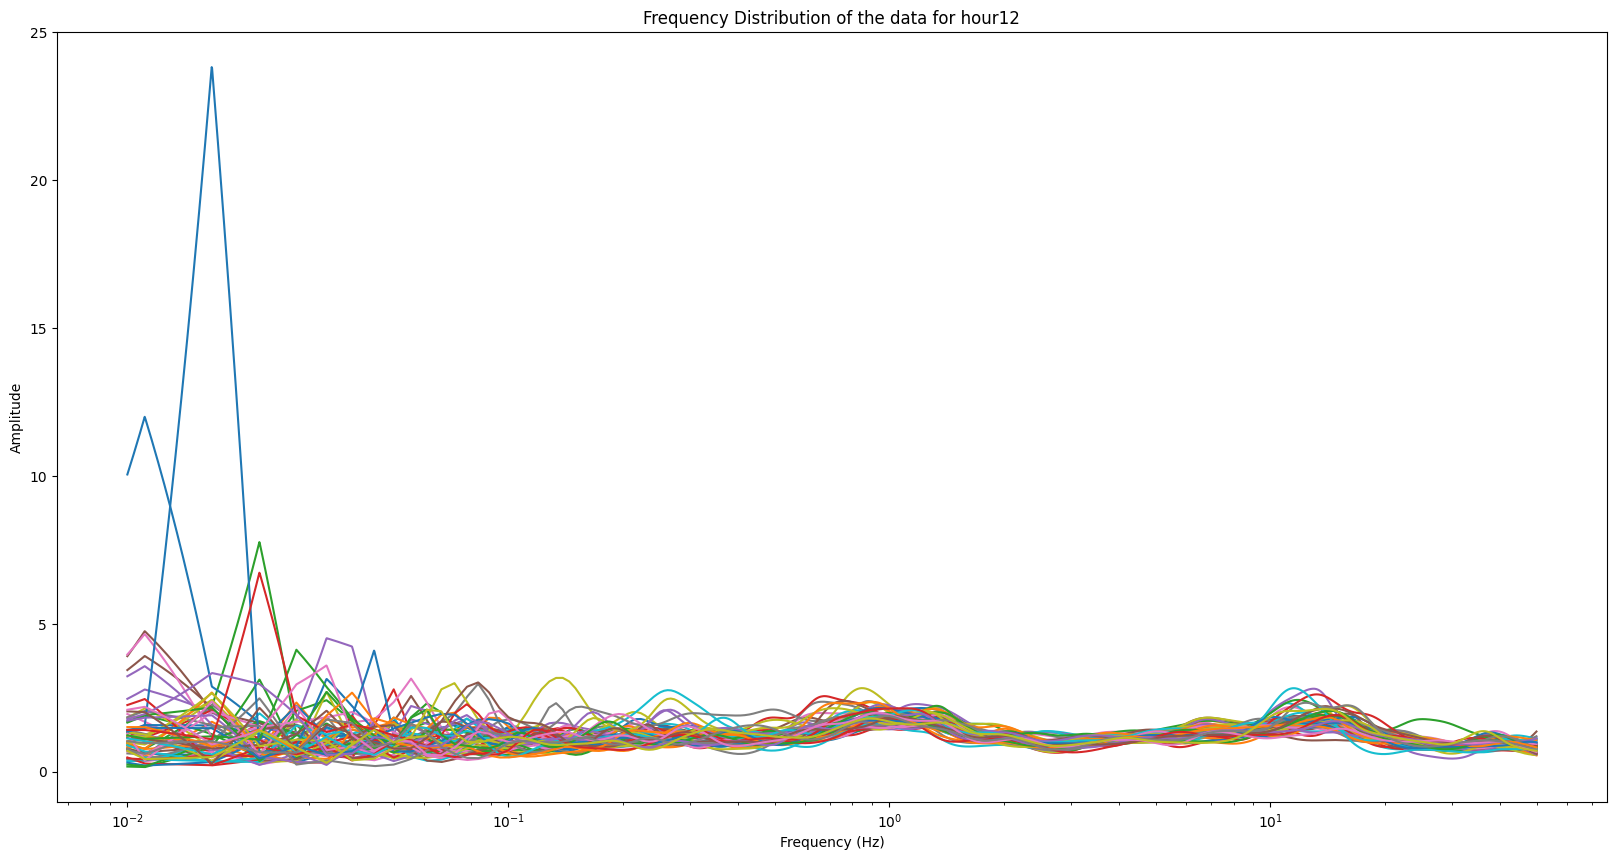

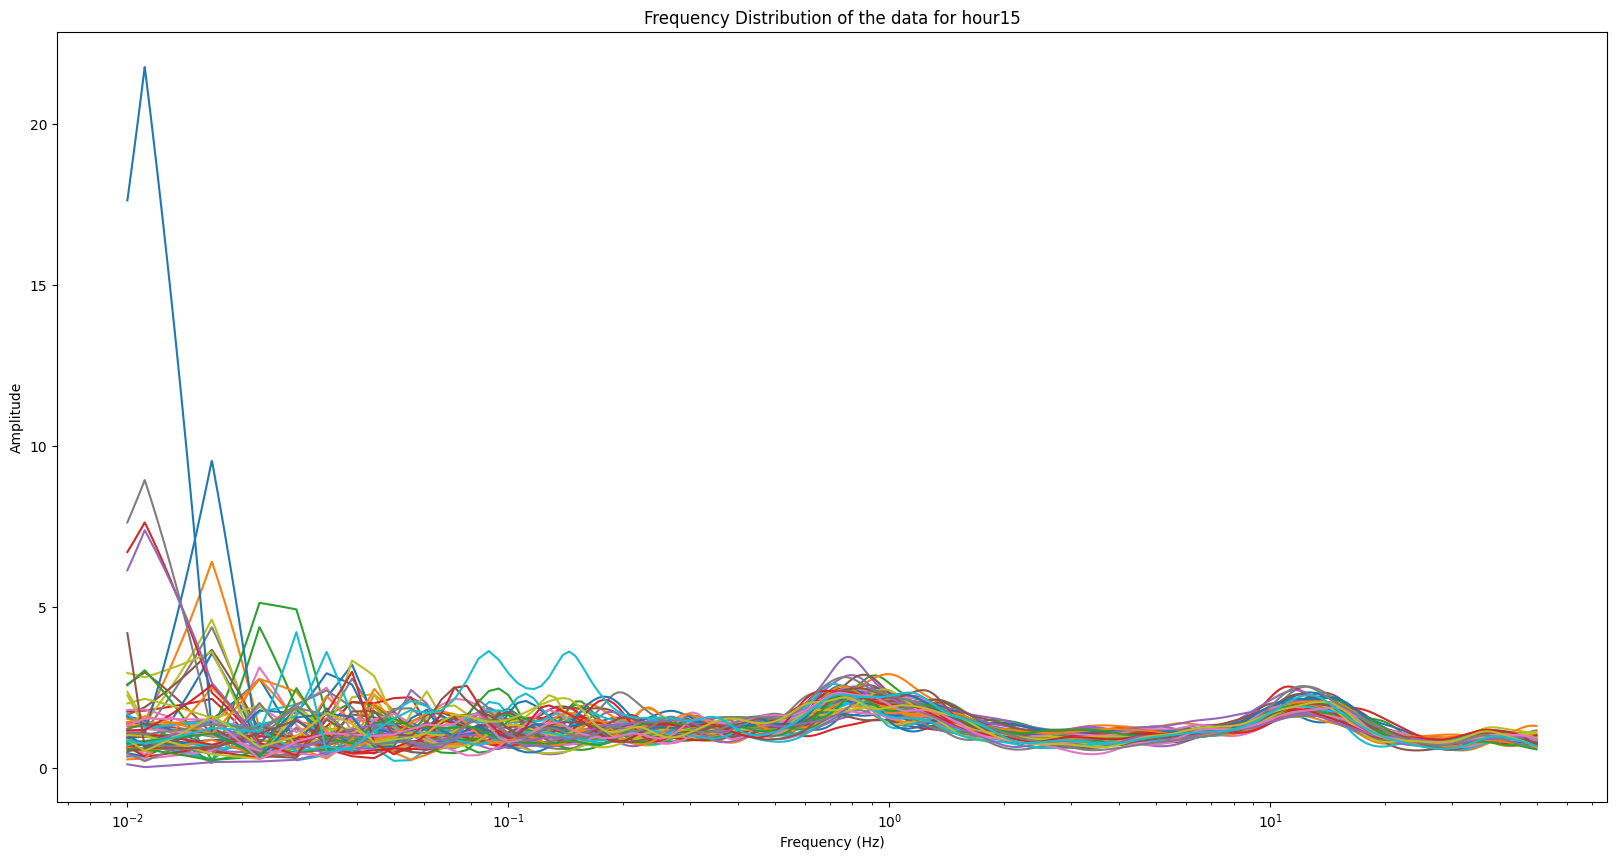

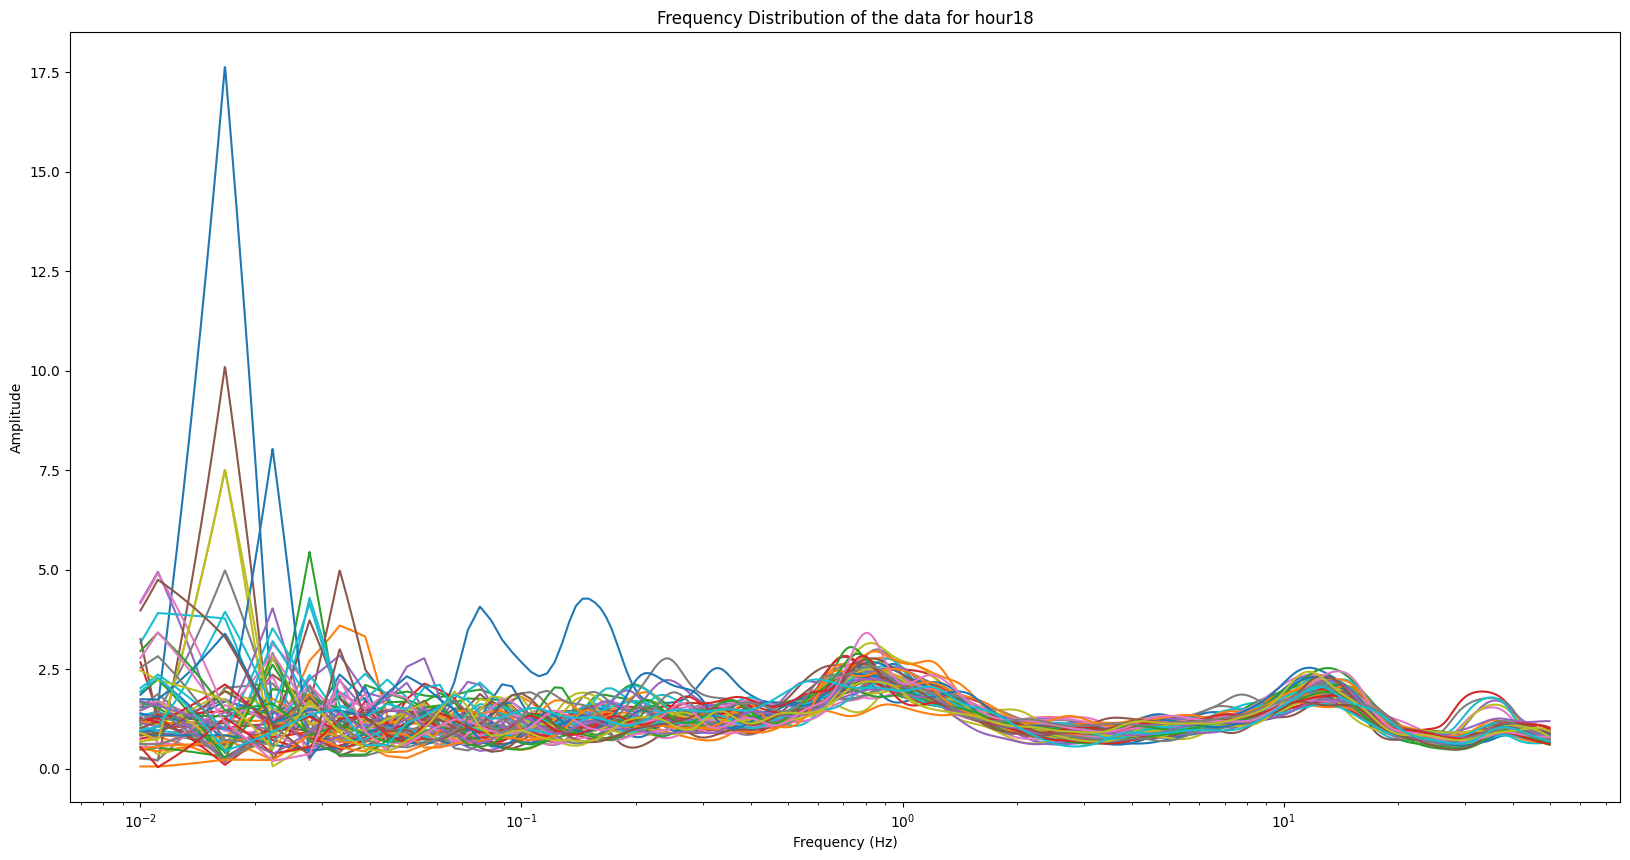

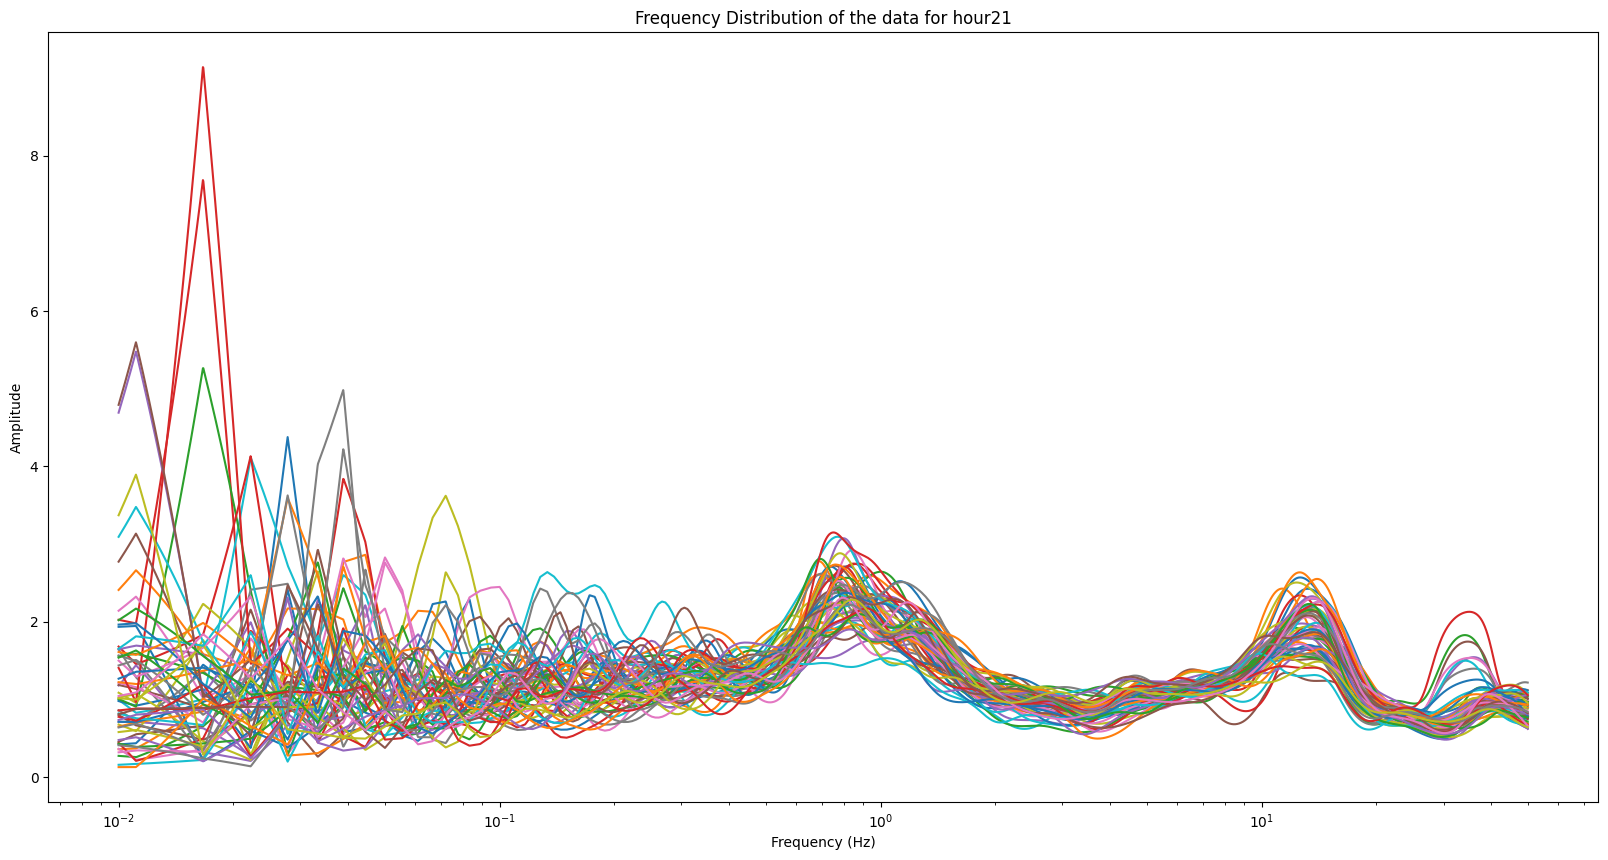

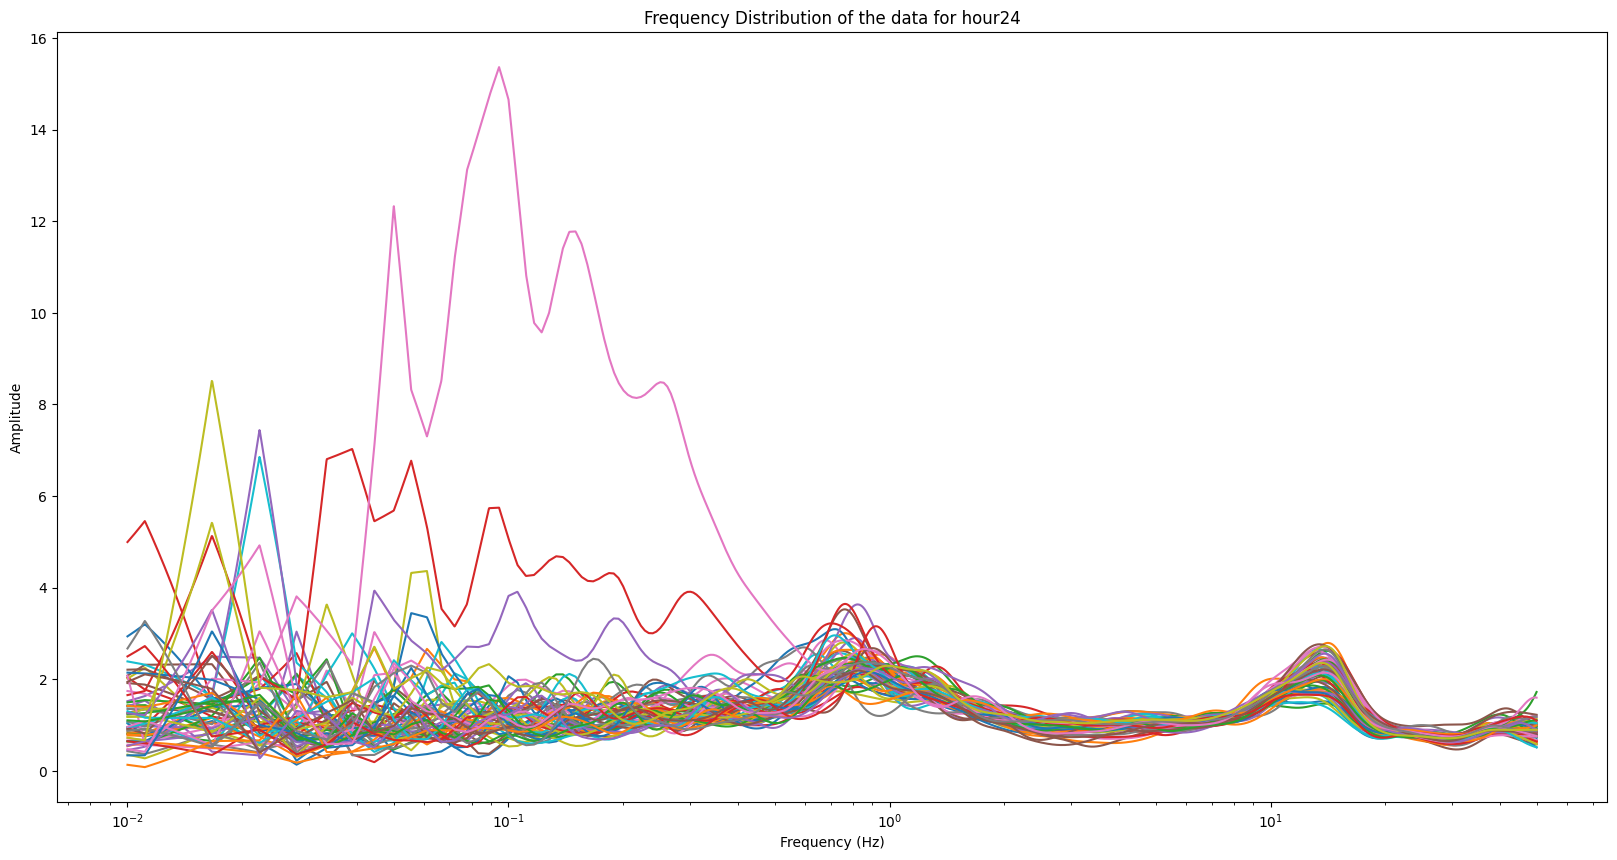

In [5]:
#Creating the frequency distribution of the data for all the hours using log scale
i = 3
for hour in hours:
    #Size the graph
    plt.figure(figsize=(20, 10))
    #Confine the graph to specifidde limits
    plt.xscale('log')
    #plt.xlim(0, 50)
    #plt.ylim(0, 6)
    #Plot the data
    for column in hour.columns[1:]:
        plt.plot(hour['Freq_Hz'], hour[column])
    #Label the graph
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Distribution of the data for hour' + str(i))
    #Show the graph
    plt.show()
    i += 3

In [6]:
#find the average peaks for each three hour interval
i = 3
for hour in hours:
    peaks = []
    for column in hour.columns[1:]:
        peaks.append(len(find_peaks(hour[column])[0]))
    print('Average peaks for hour ' + str(i) + ' is: ' + str(np.mean(peaks)))
    i += 3

Average peaks for hour 3 is: 14.816666666666666
Average peaks for hour 6 is: 14.9
Average peaks for hour 9 is: 15.383333333333333
Average peaks for hour 12 is: 15.559322033898304
Average peaks for hour 15 is: 14.283333333333333
Average peaks for hour 18 is: 13.35
Average peaks for hour 21 is: 14.186440677966102
Average peaks for hour 24 is: 13.88135593220339


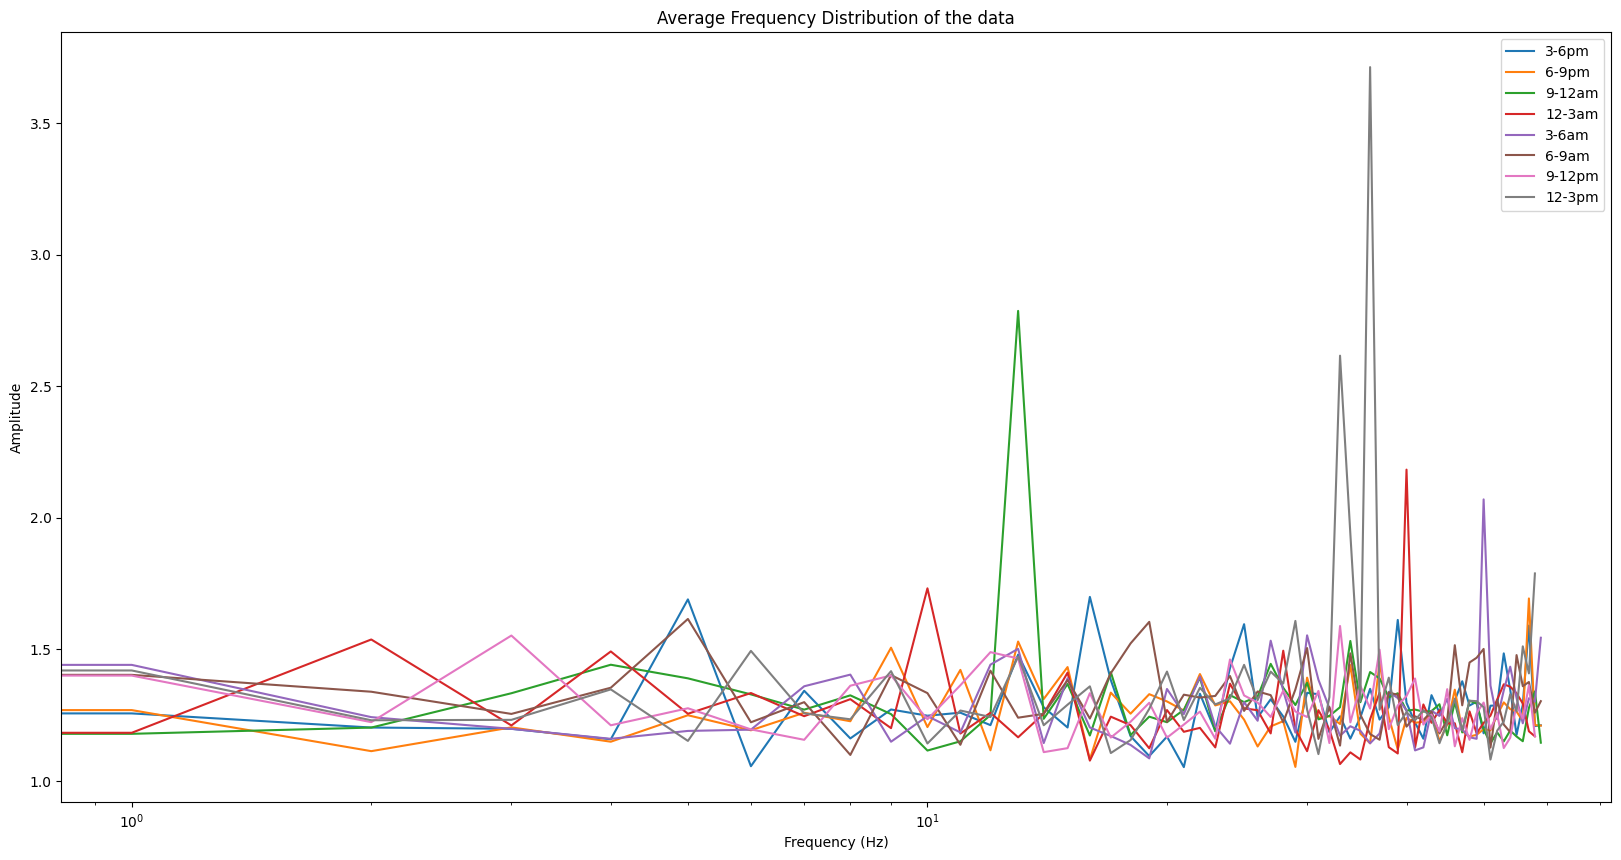

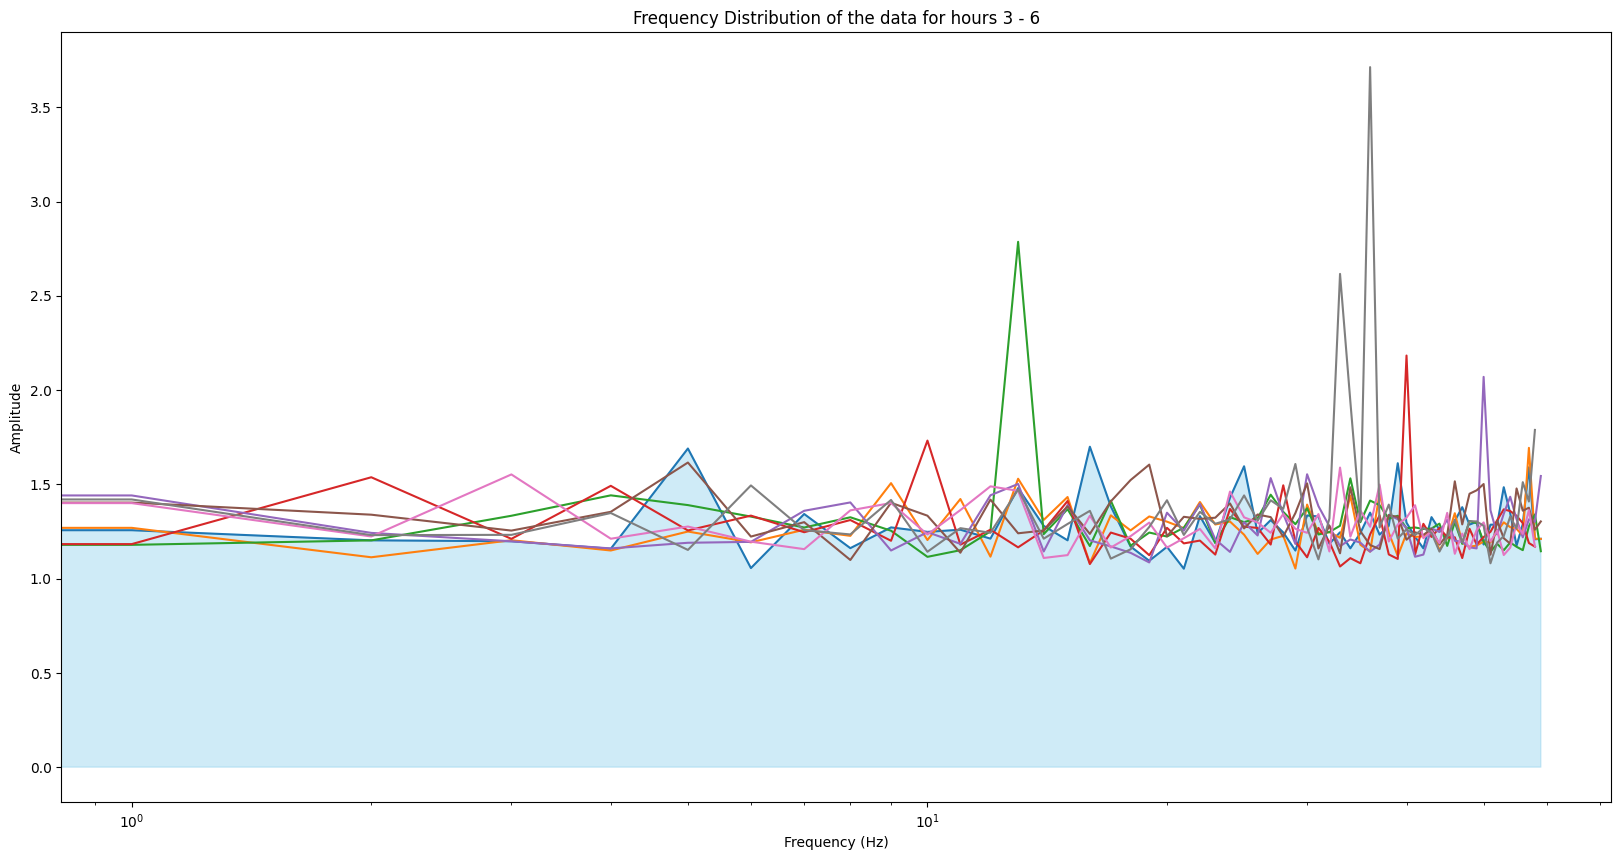

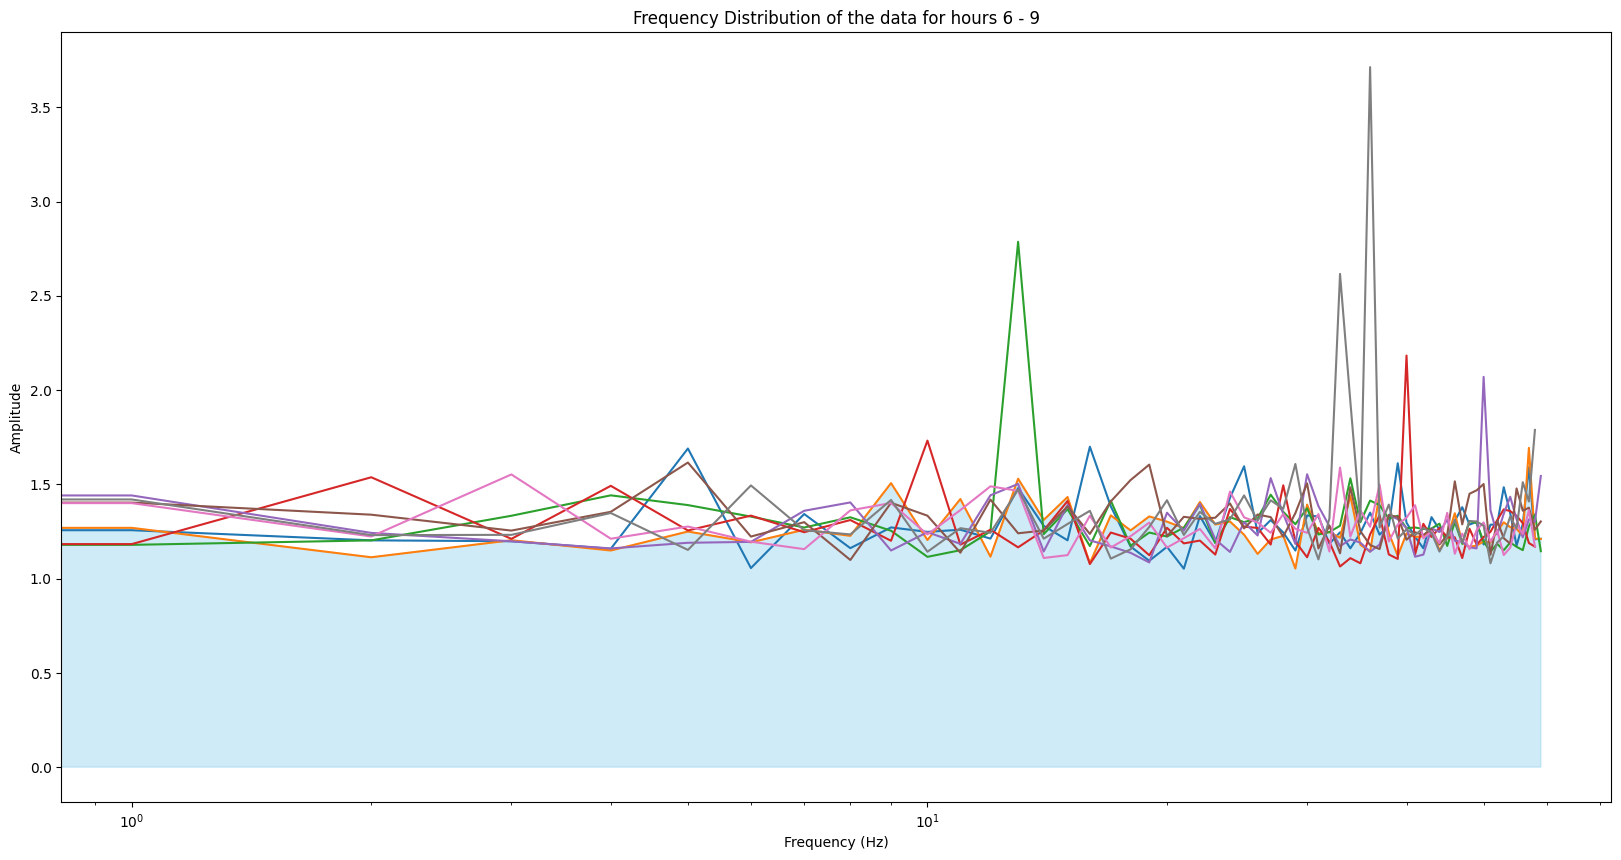

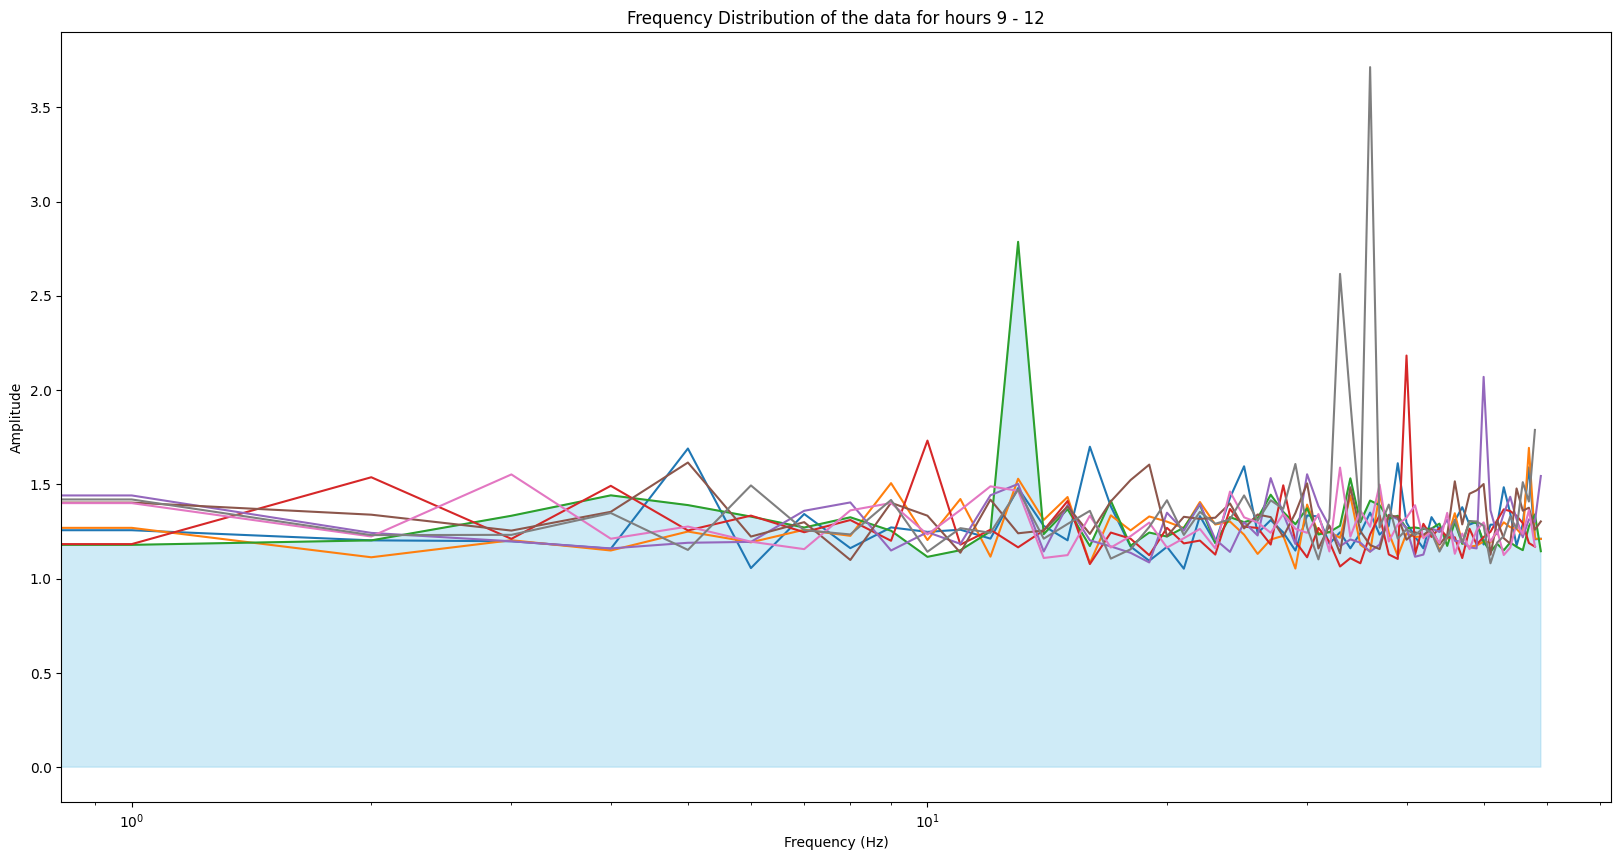

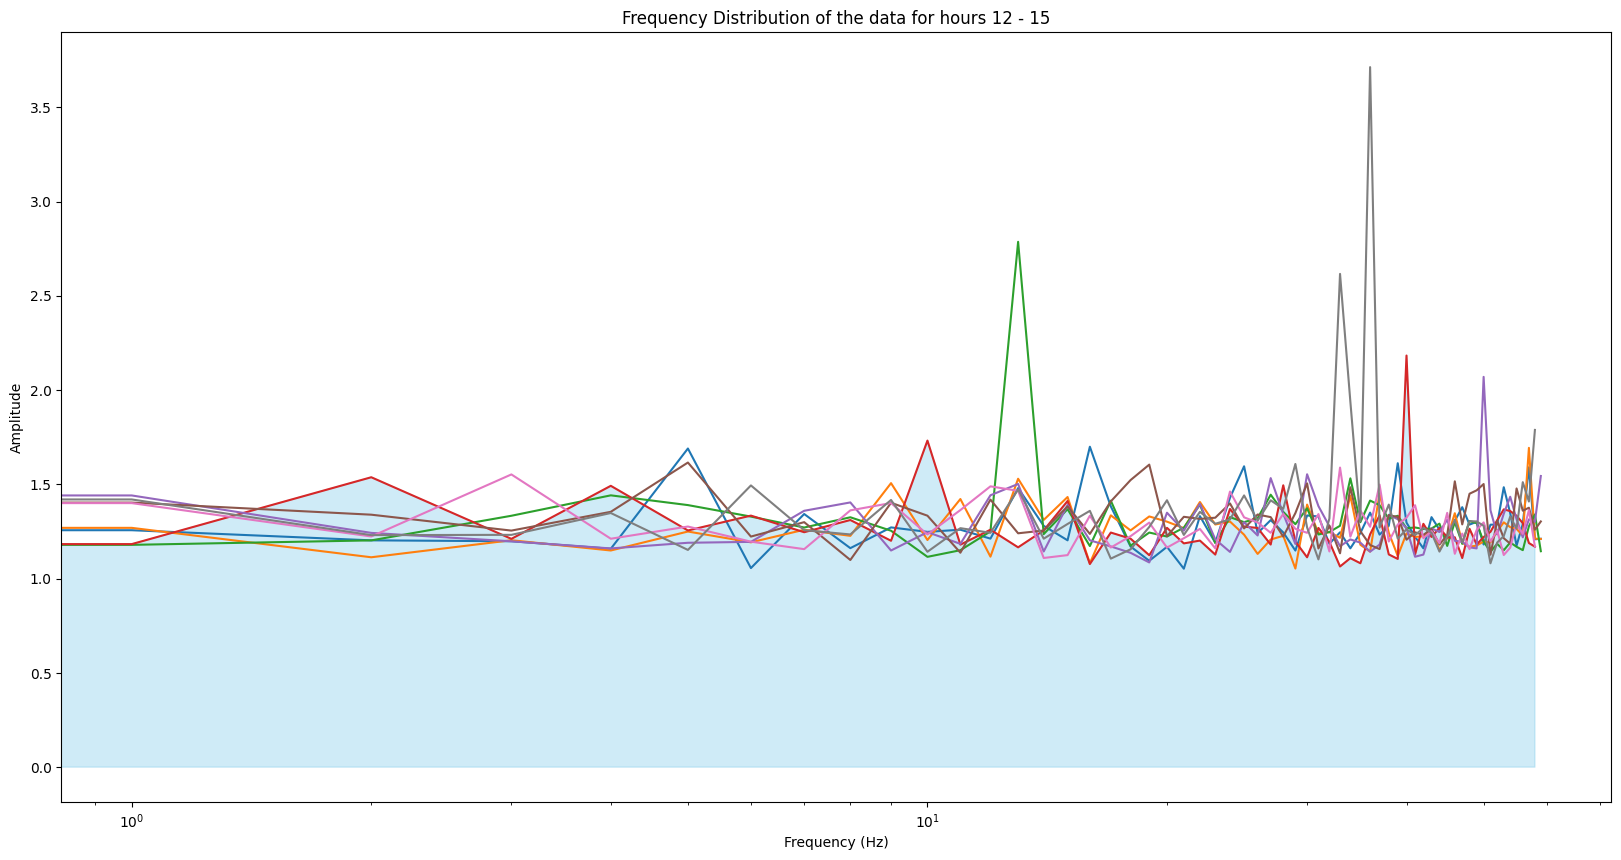

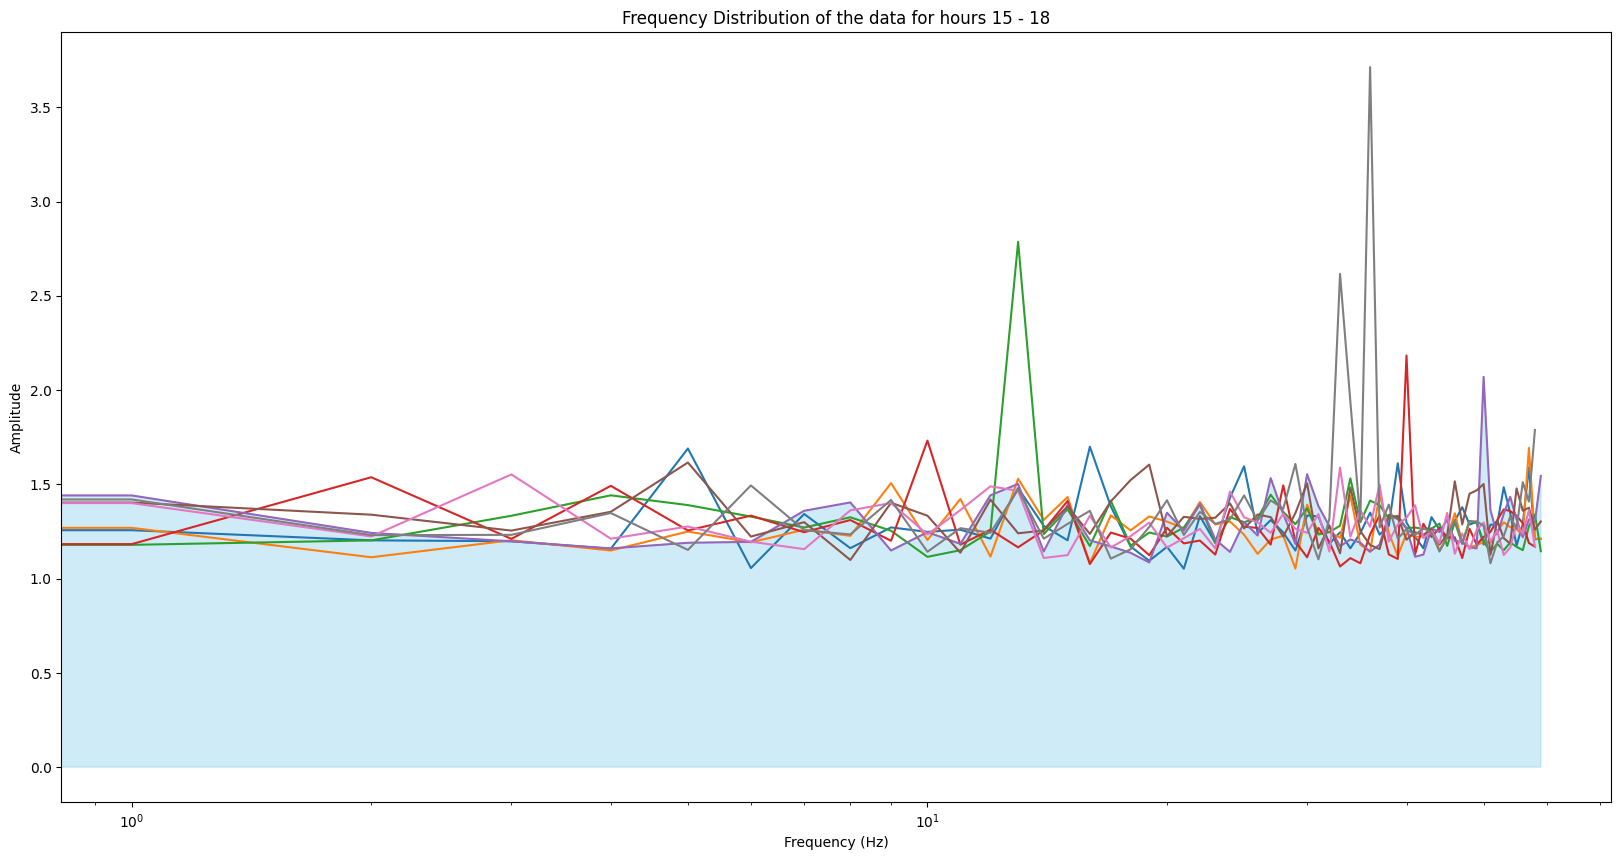

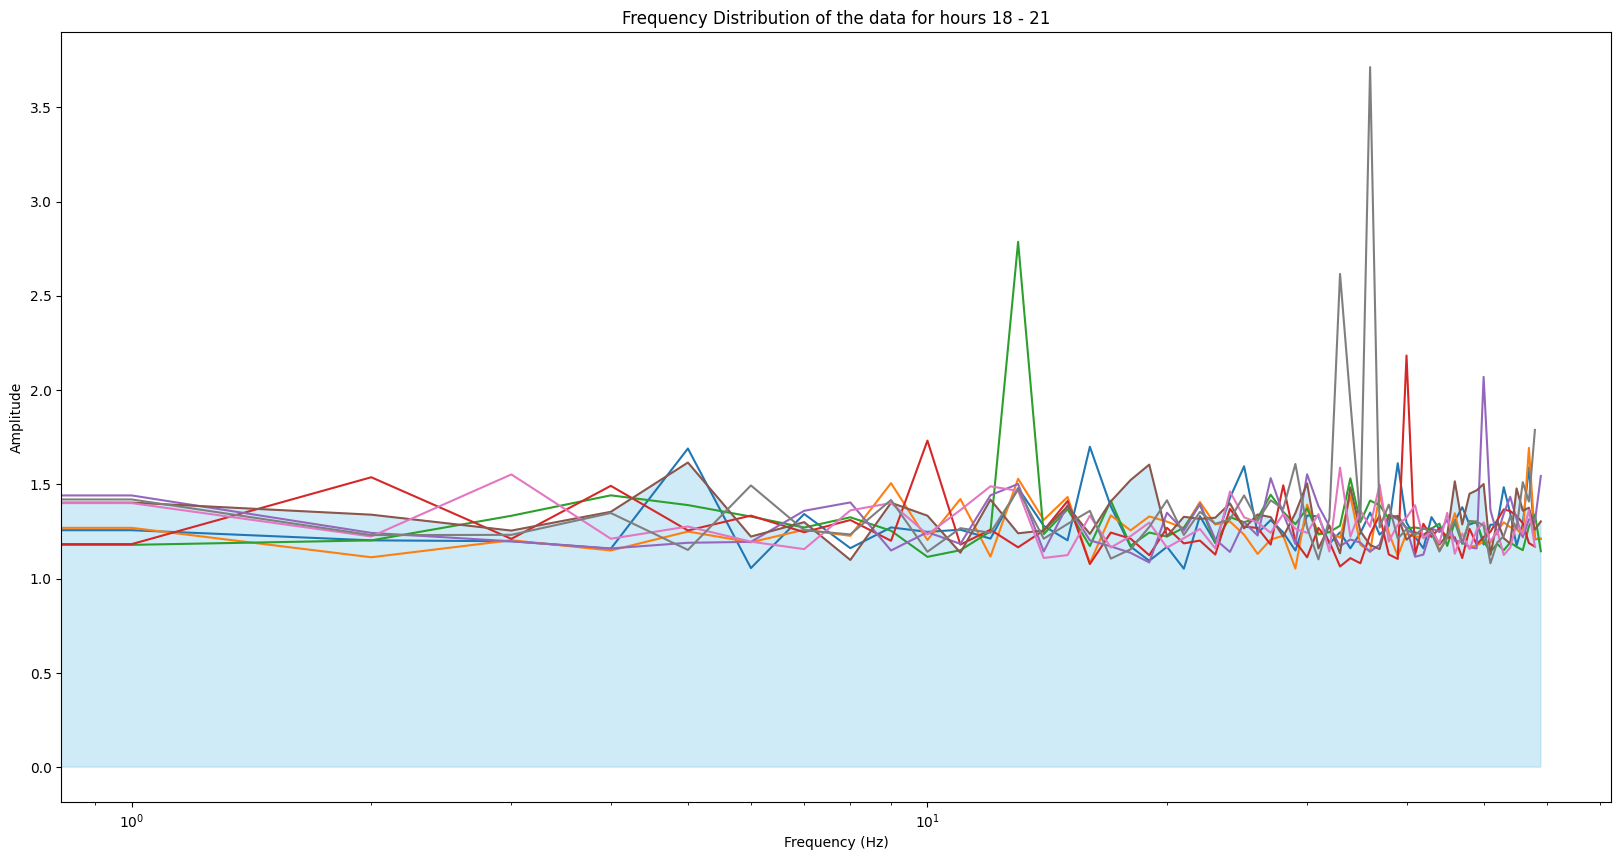

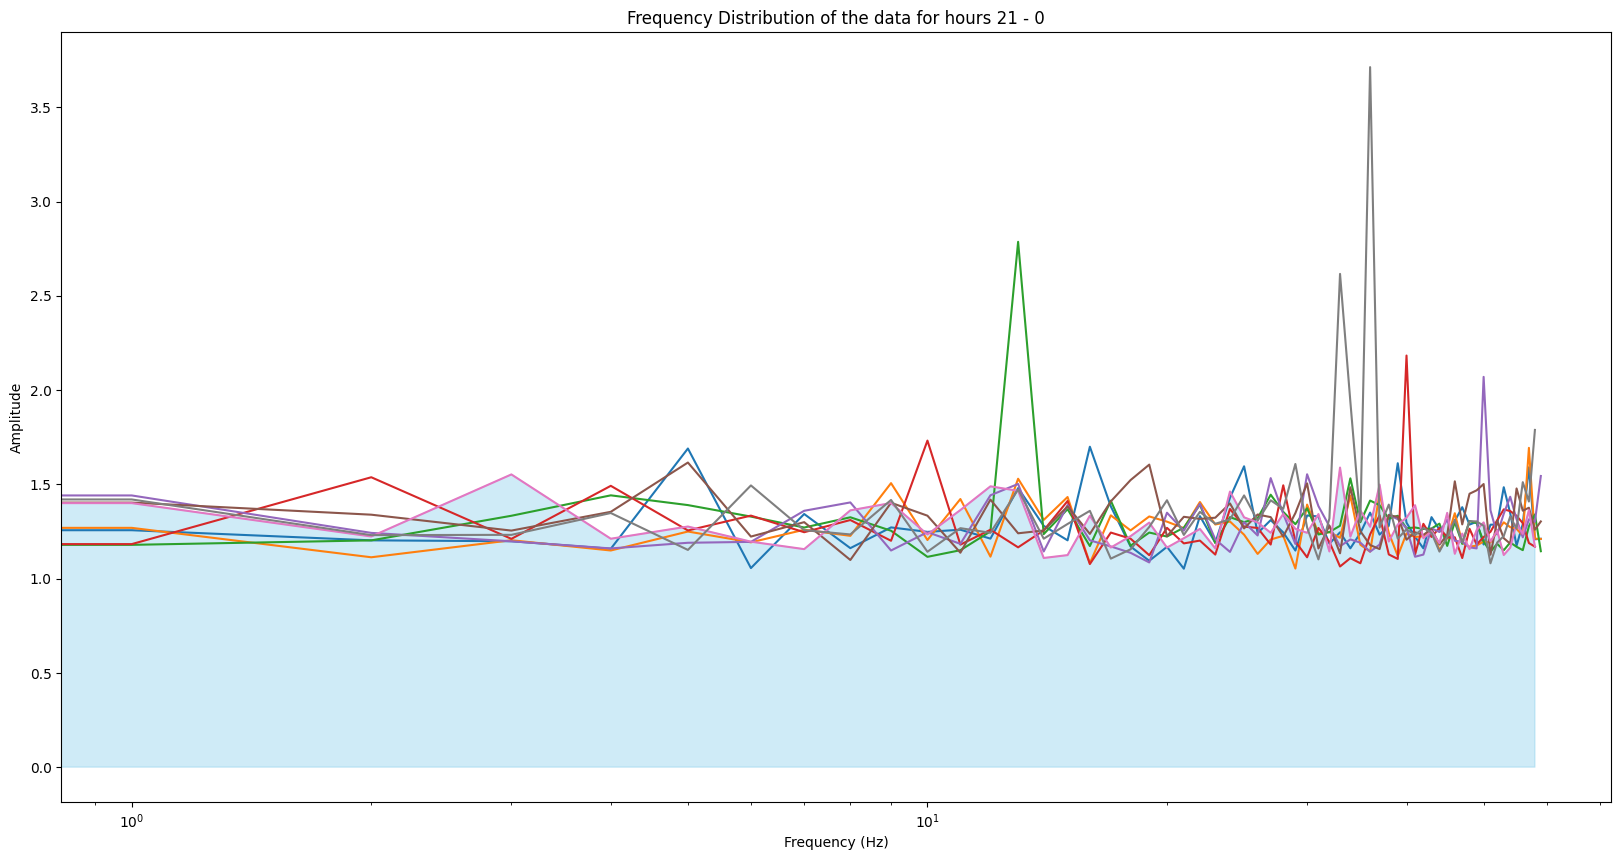

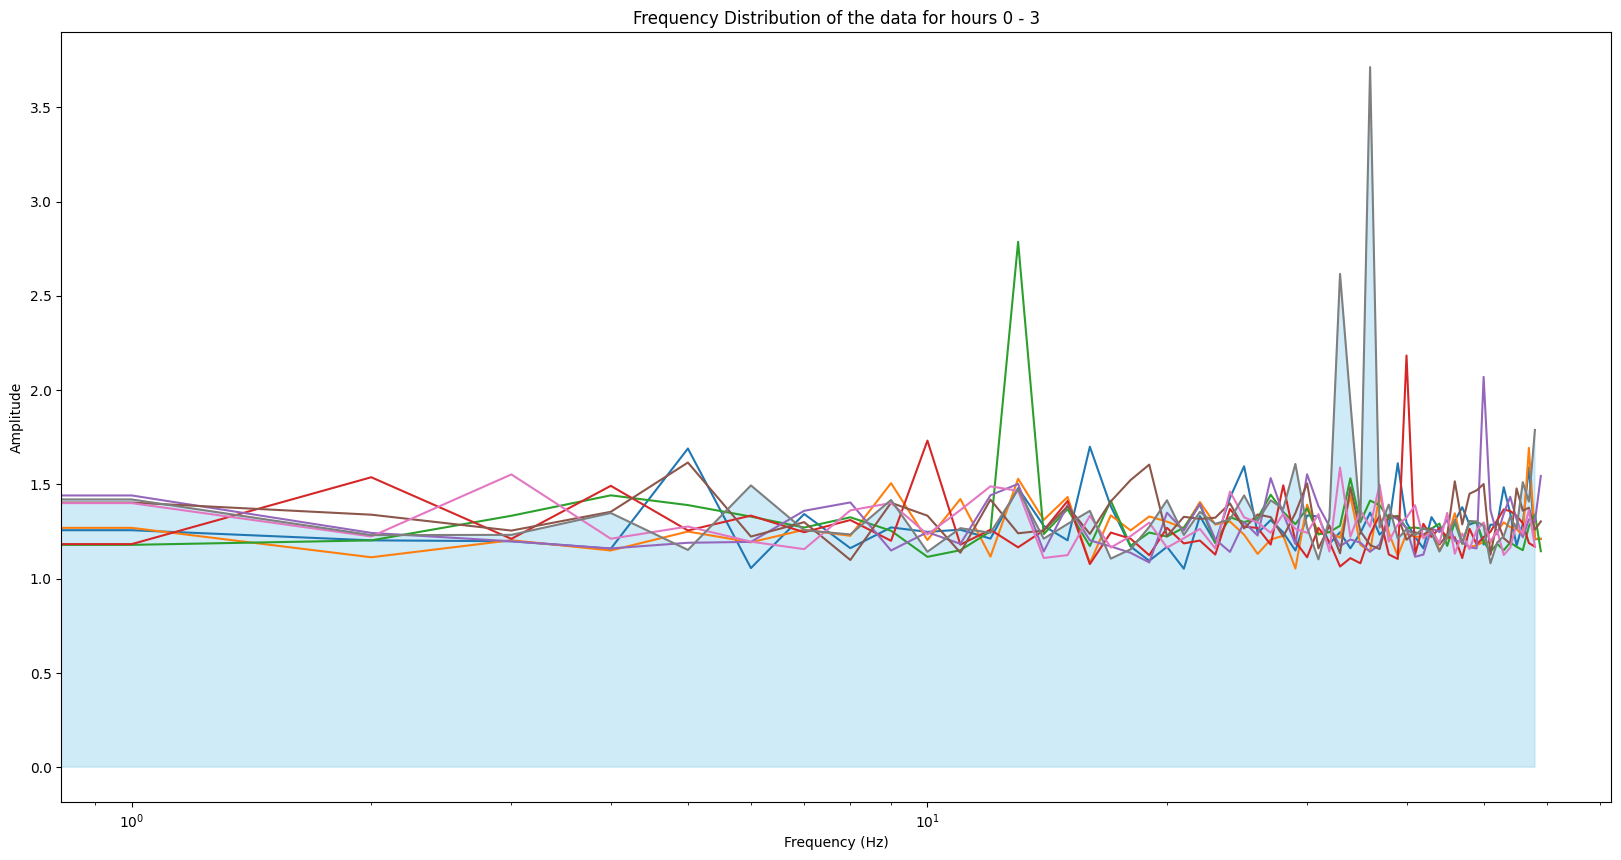

In [7]:
#Create a new dataframe average of each column for each hour
data = []
i = 3
for hour in hours:
    averages = []
    for column in hour.columns[1:]:
        averages.append(np.mean(hour[column]))
    data.append(averages)
    i += 3

#plot the average of each column for each hour
i = 3
plt.figure(figsize=(20, 10))
for hour in data:
    plt.plot(hour)

plt.xscale('log')
plt.legend(['3-6pm', '6-9pm', '9-12am', '12-3am', '3-6am', '6-9am', '9-12pm', '12-3pm'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Average Frequency Distribution of the data')
plt.show()

#highlight the area under the curve for each hour individually
i = 3
for hour in data:
    plt.figure(figsize=(20, 10))
    plt.xscale('log')
    #plt.xlim(0, 60)
    #plt.ylim(0, 6)
    plt.fill_between(np.arange(0, len(hour)), hour, color = 'skyblue', alpha = 0.4)
    for hour in data:
        plt.plot(hour)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Distribution of the data for hours ' + str((i) % 24) + ' - ' + str((i + 3) % 24))
    plt.show()
    i += 3
    

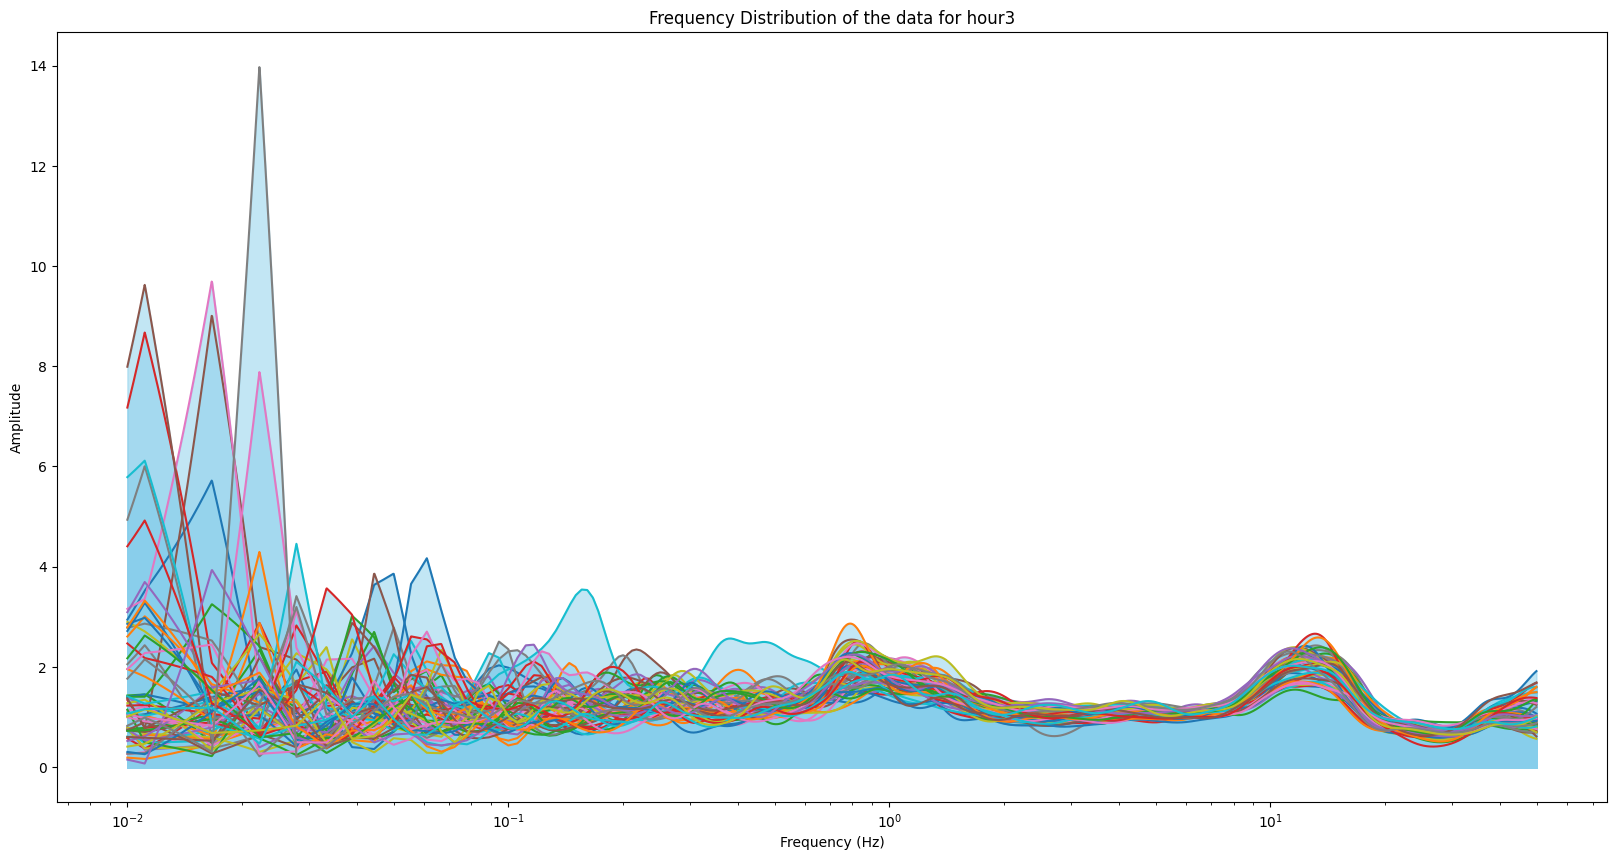

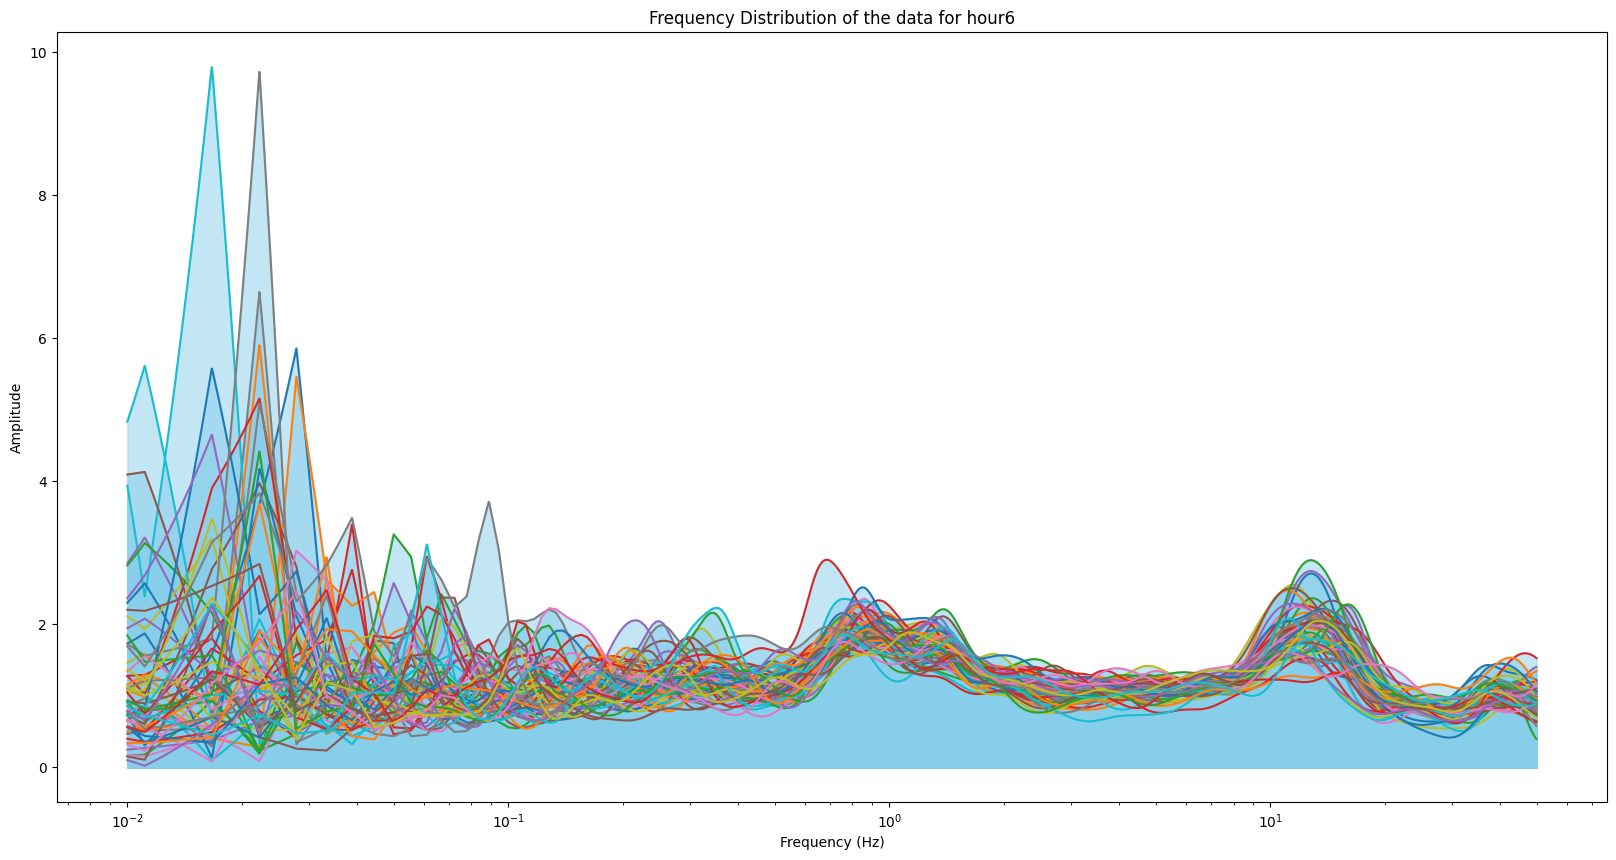

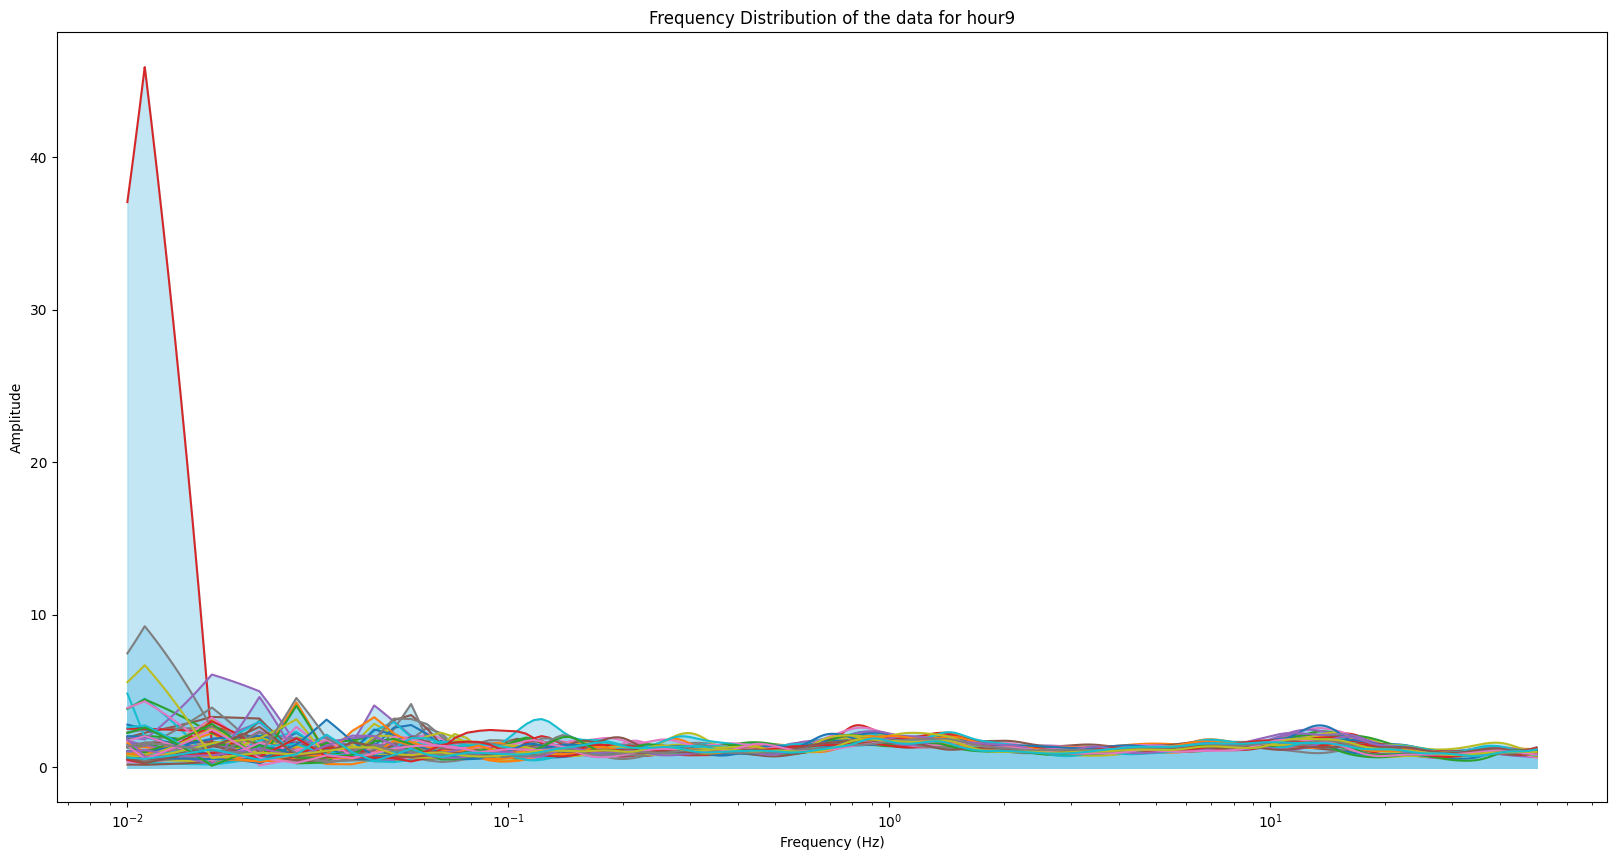

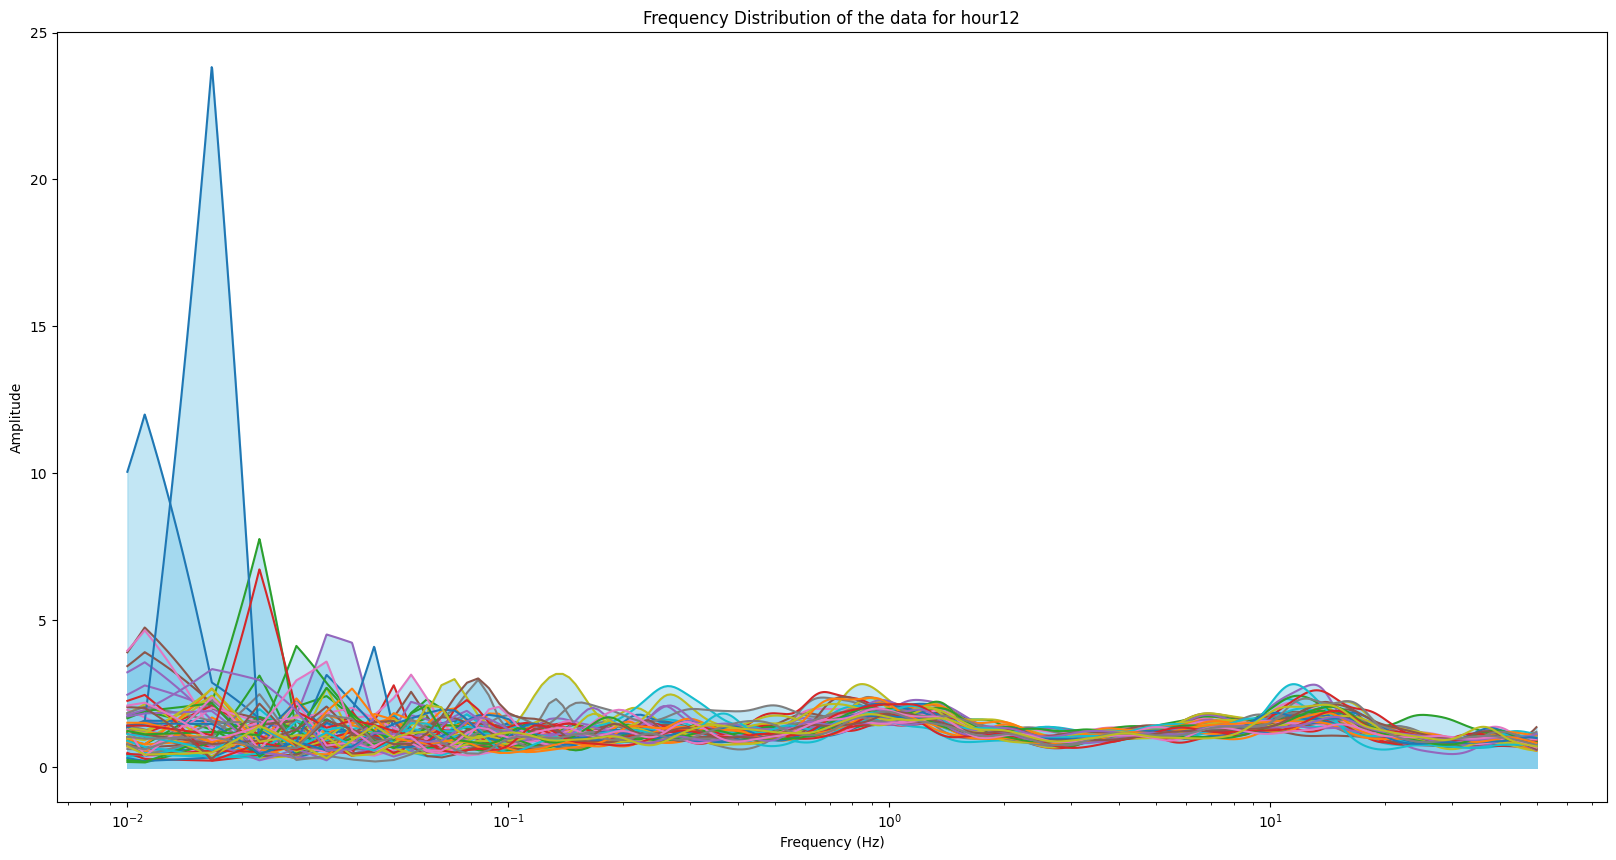

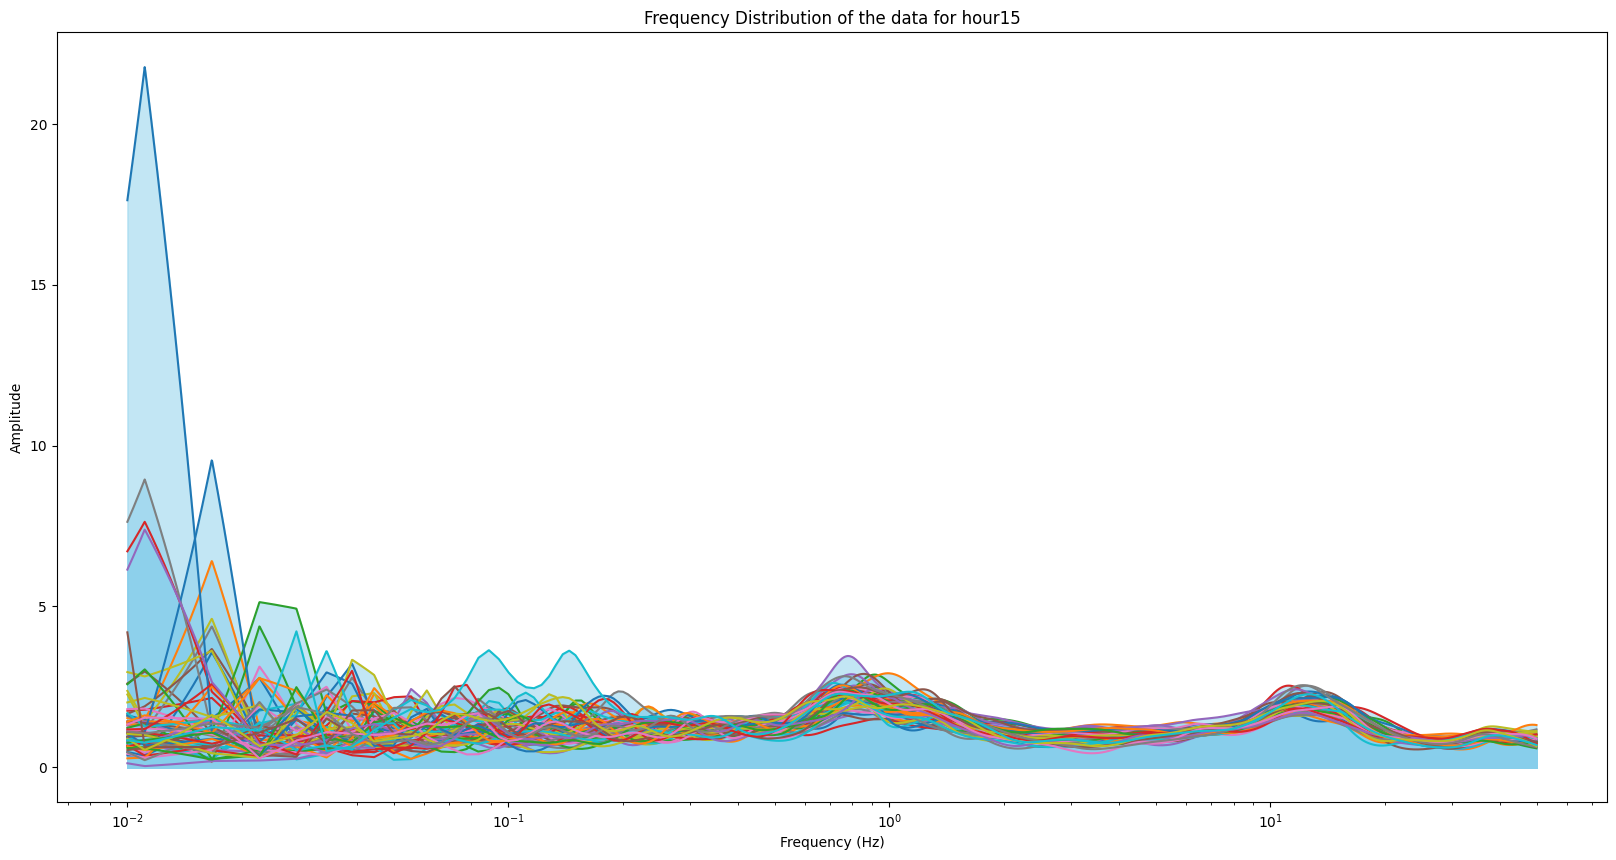

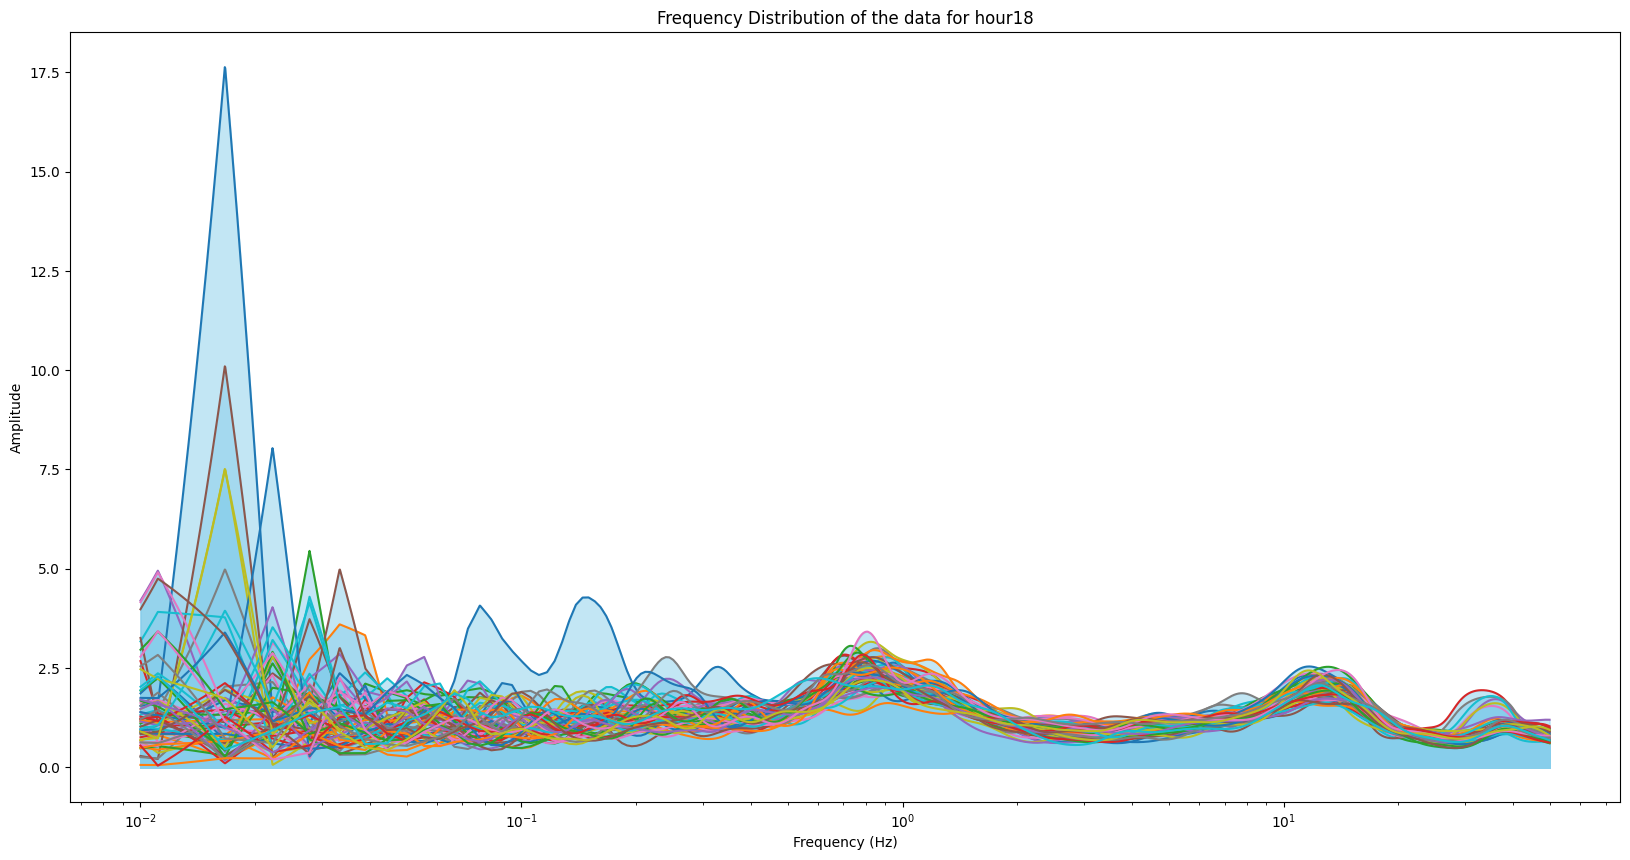

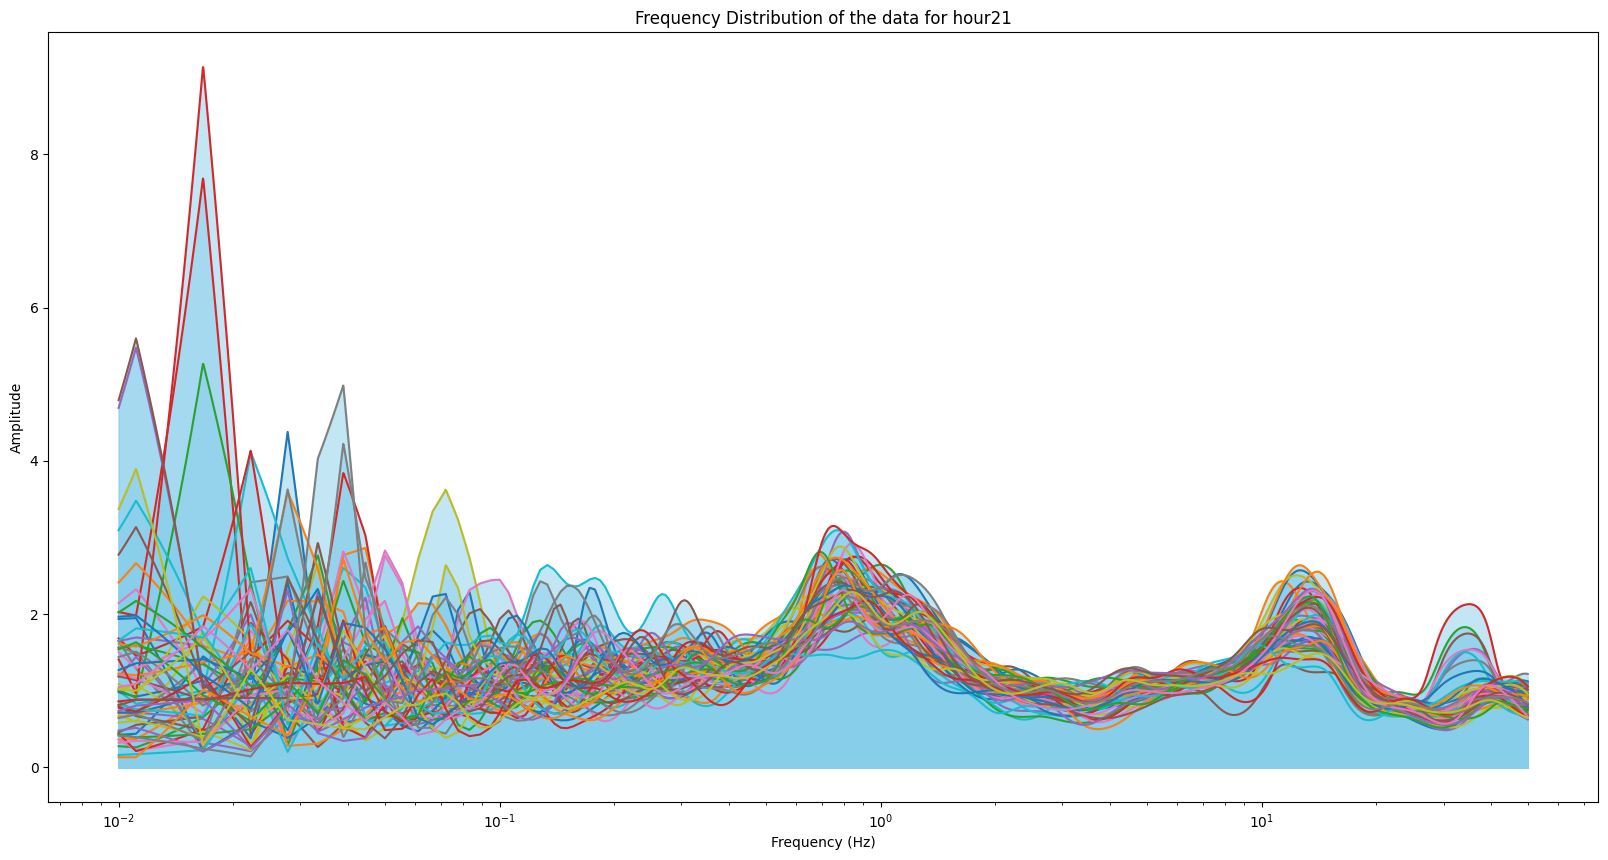

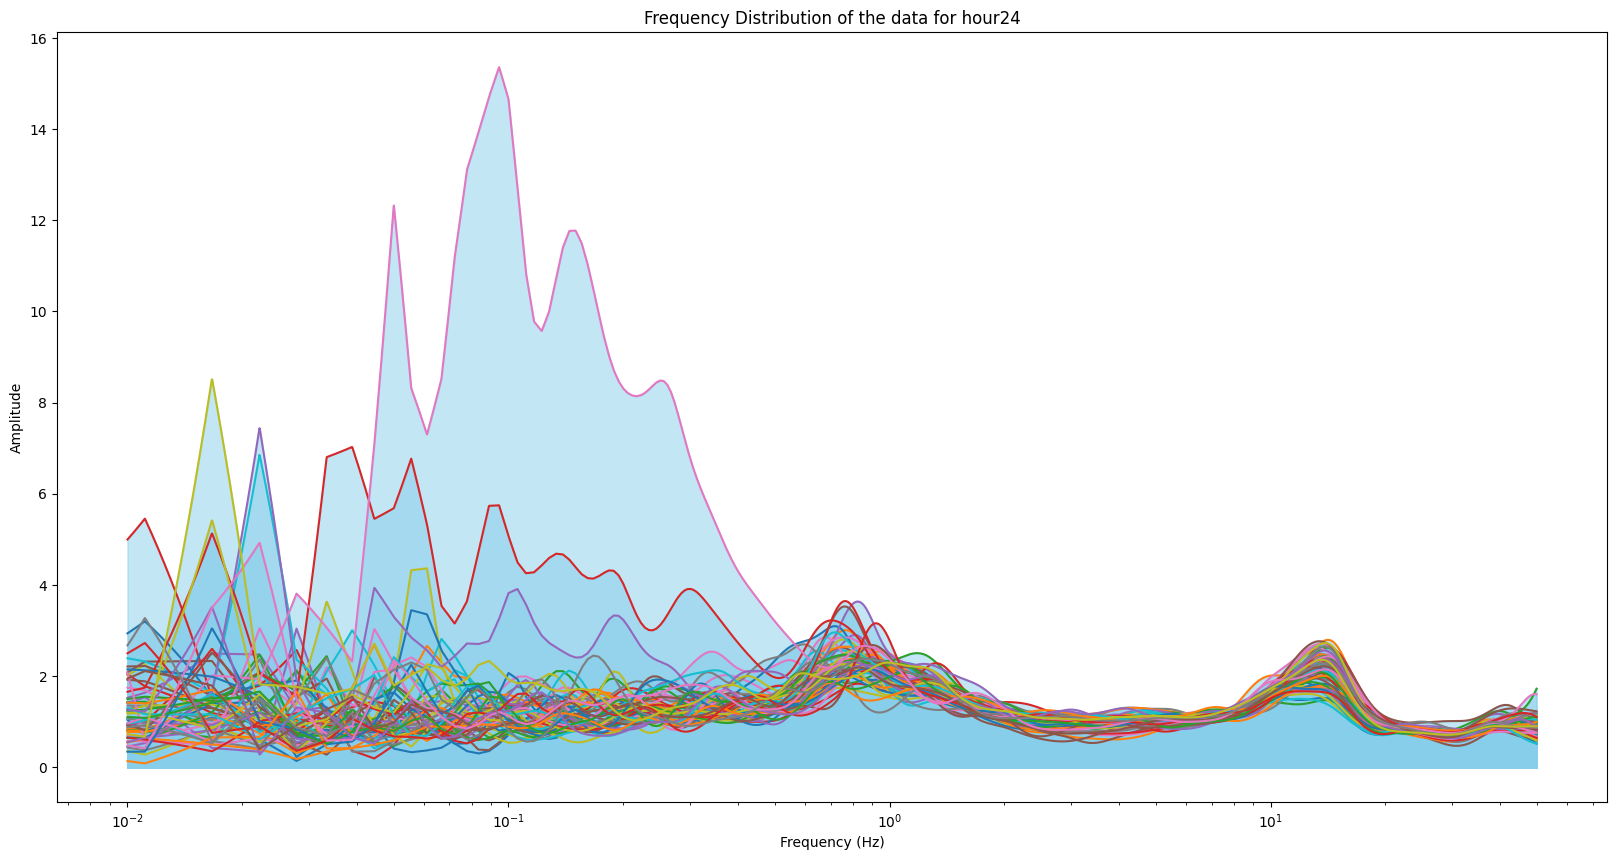

In [8]:
#Highlight the area under the curve for all the hours
i = 3
for hour in hours:
    #Size the graph
    plt.figure(figsize=(20, 10))
    #Confine the graph to specifidde limits
    plt.xscale('log')
    #plt.xlim(0, 50)
    #plt.ylim(0, 6)
    #Plot the data
    for column in hour.columns[1:]:
        plt.plot(hour['Freq_Hz'], hour[column])
        plt.fill_between(hour['Freq_Hz'], hour[column], color = 'skyblue', alpha = 0.5)
    #Label the graph
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Distribution of the data for hour' + str(i))
    #Show the graph
    plt.show()
    i += 3

In [9]:
#Calculate the area under the curve for all the hours
i = 3
curve = []
for hour in hours:
    for column in hour.columns[1:]:
        curve.append([i, column, np.trapz(hour[column], hour['Freq_Hz'])])
    i += 3

print(curve)

[[3, '18:00 - 18:03', 55.58955299206366], [3, '18:03 - 18:06', 54.94072761664633], [3, '18:06 - 18:09', 53.96495311336266], [3, '18:09 - 18:12', 49.430318964460334], [3, '18:12 - 18:15', 52.16908889500636], [3, '18:15 - 18:18', 53.70116220996986], [3, '18:18 - 18:21', 51.160034008214424], [3, '18:21 - 18:24', 56.74146679339347], [3, '18:24 - 18:27', 50.631660940615], [3, '18:27 - 18:30', 54.73191097920769], [3, '18:30 - 18:33', 51.704533928387534], [3, '18:33 - 18:36', 54.19311637645952], [3, '18:36 - 18:39', 53.86258133965559], [3, '18:39 - 18:42', 49.187397203626176], [3, '18:42 - 18:45', 55.98973072506318], [3, '18:45- 18:48', 53.95579121047434], [3, '18:48 - 18:51', 56.67273325716381], [3, '18:51 - 18:54', 57.36919376894969], [3, '18:54 - 18:57', 51.53208477859777], [3, '18:57 - 19:00', 53.96722460285635], [3, '19:00 - 19:03', 51.86802572041126], [3, '19:03 - 19:06', 51.396038507056815], [3, '19:06 - 19:09', 52.41724788713617], [3, '19:09 - 19:12', 52.855268033457484], [3, '19:12 -

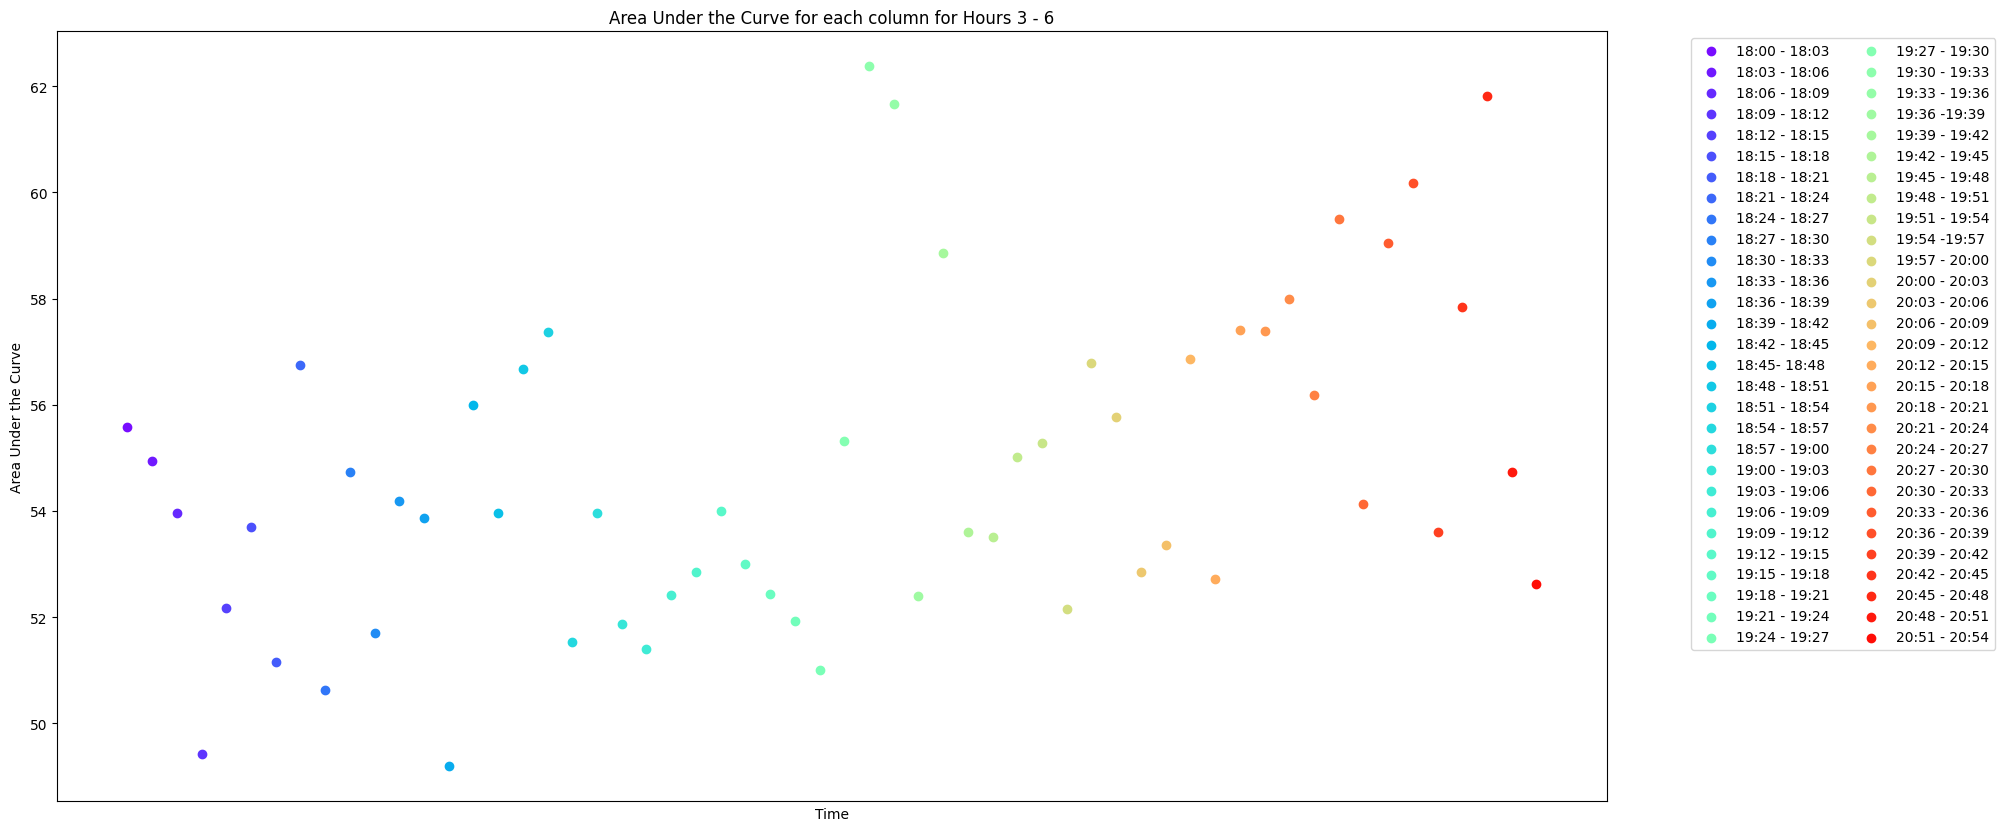

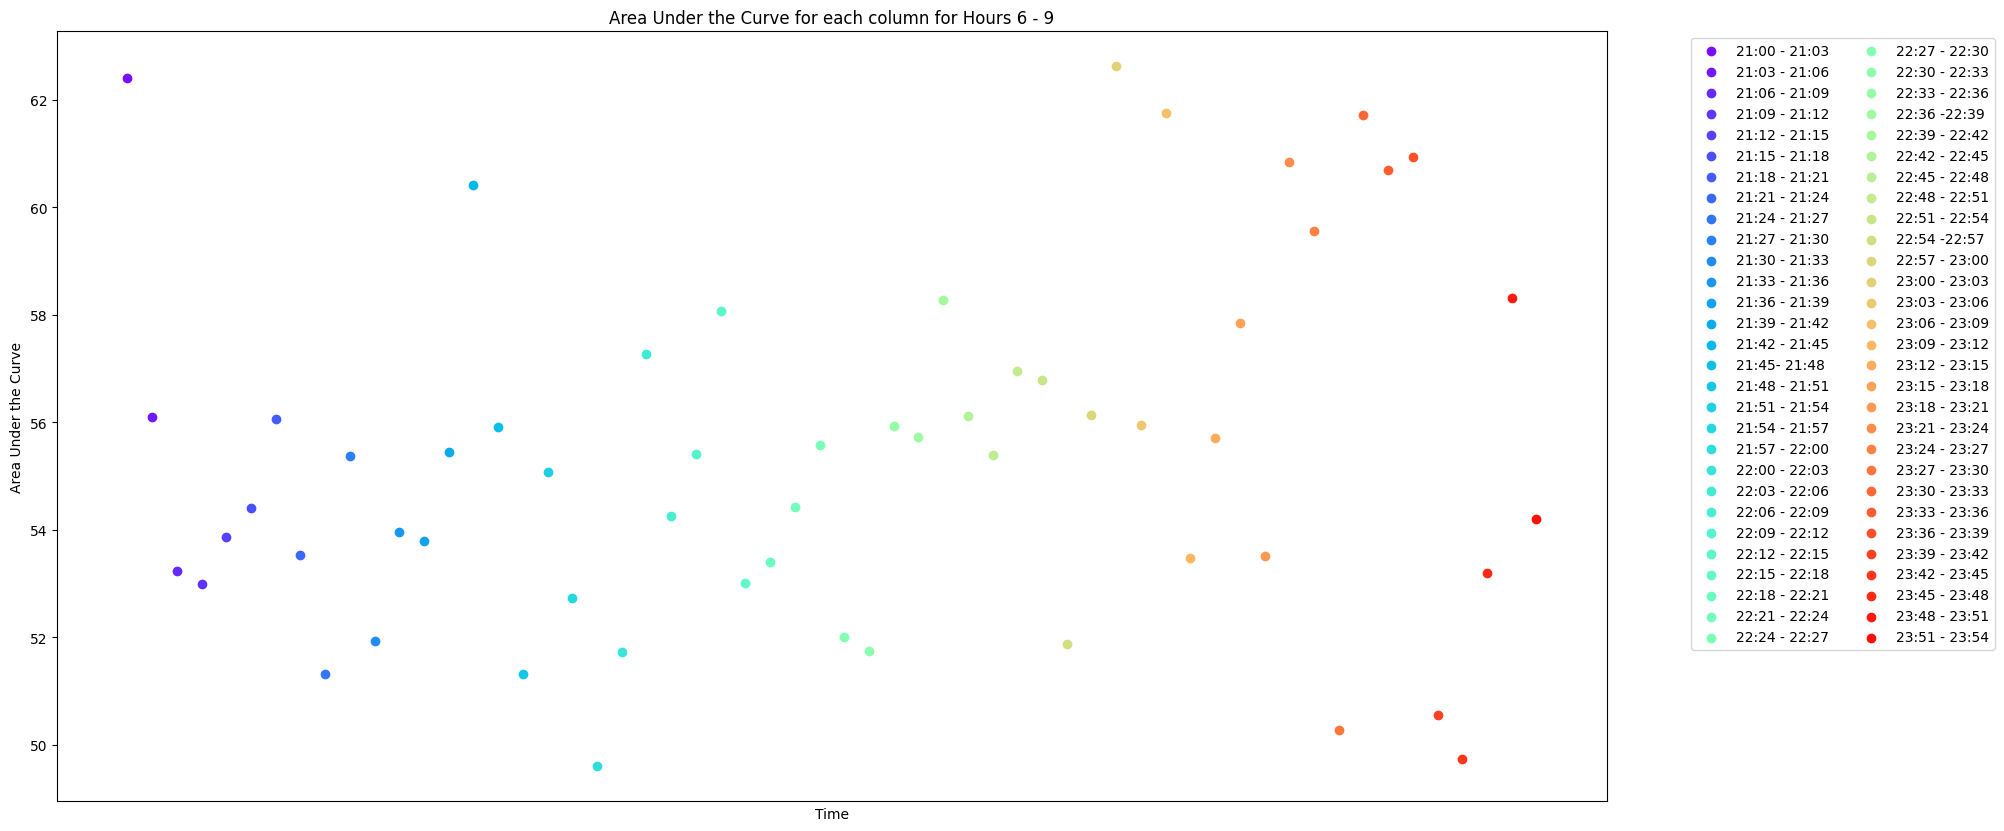

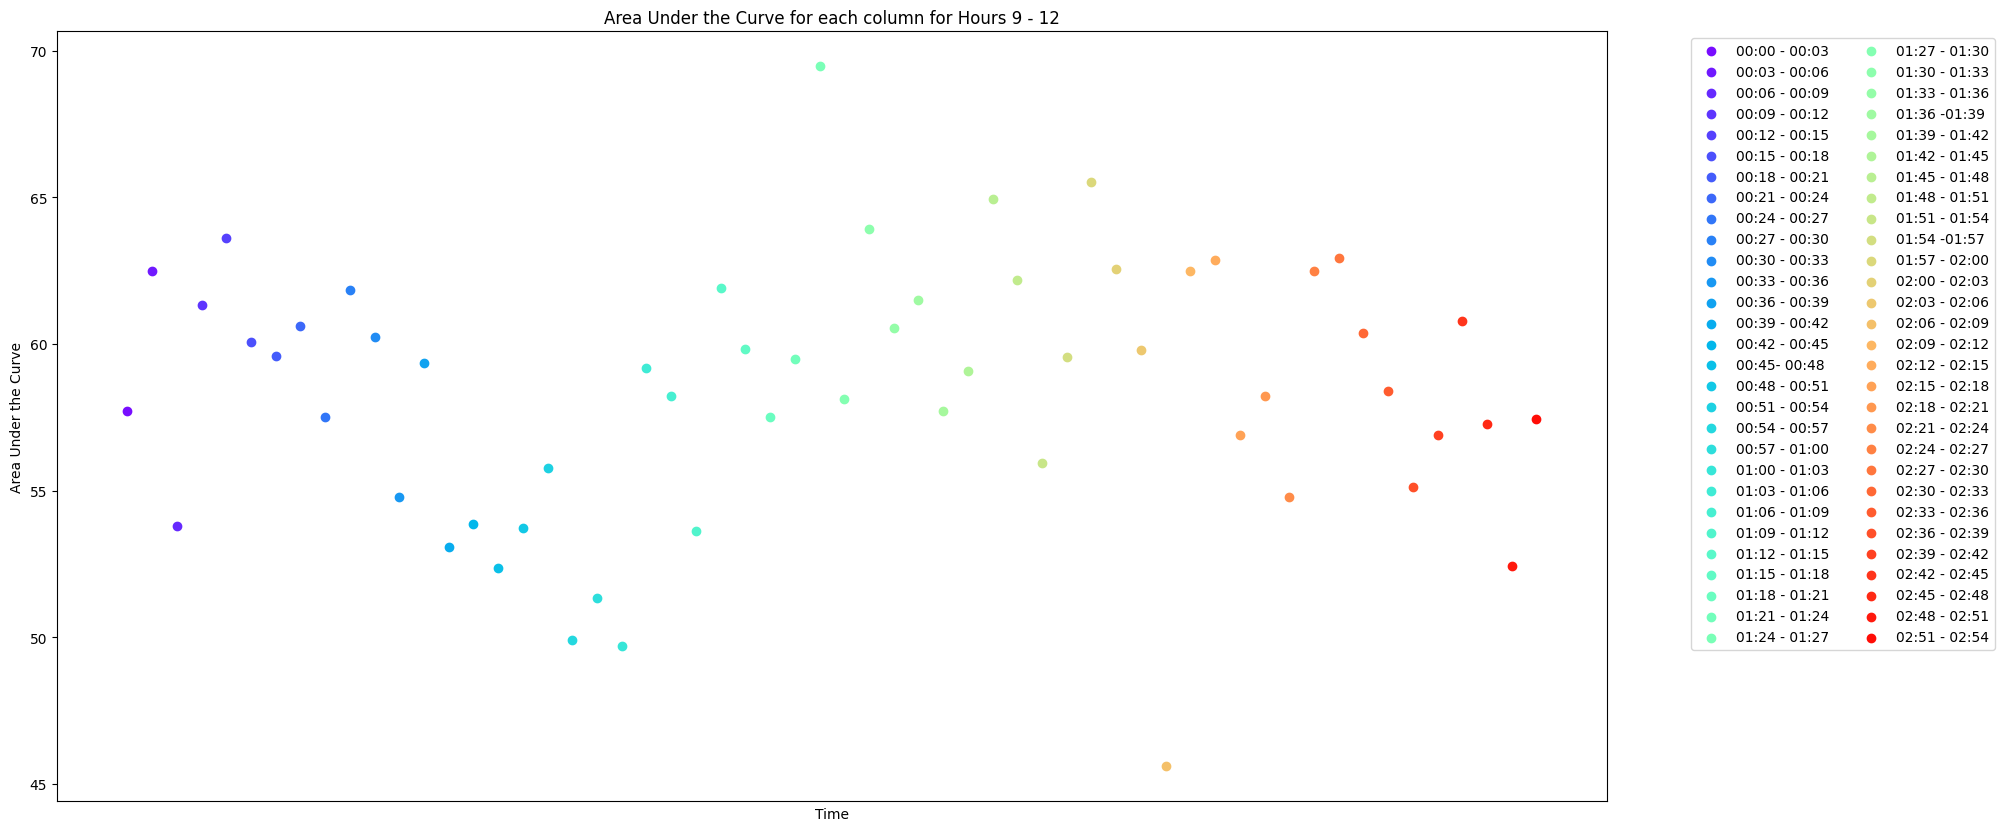

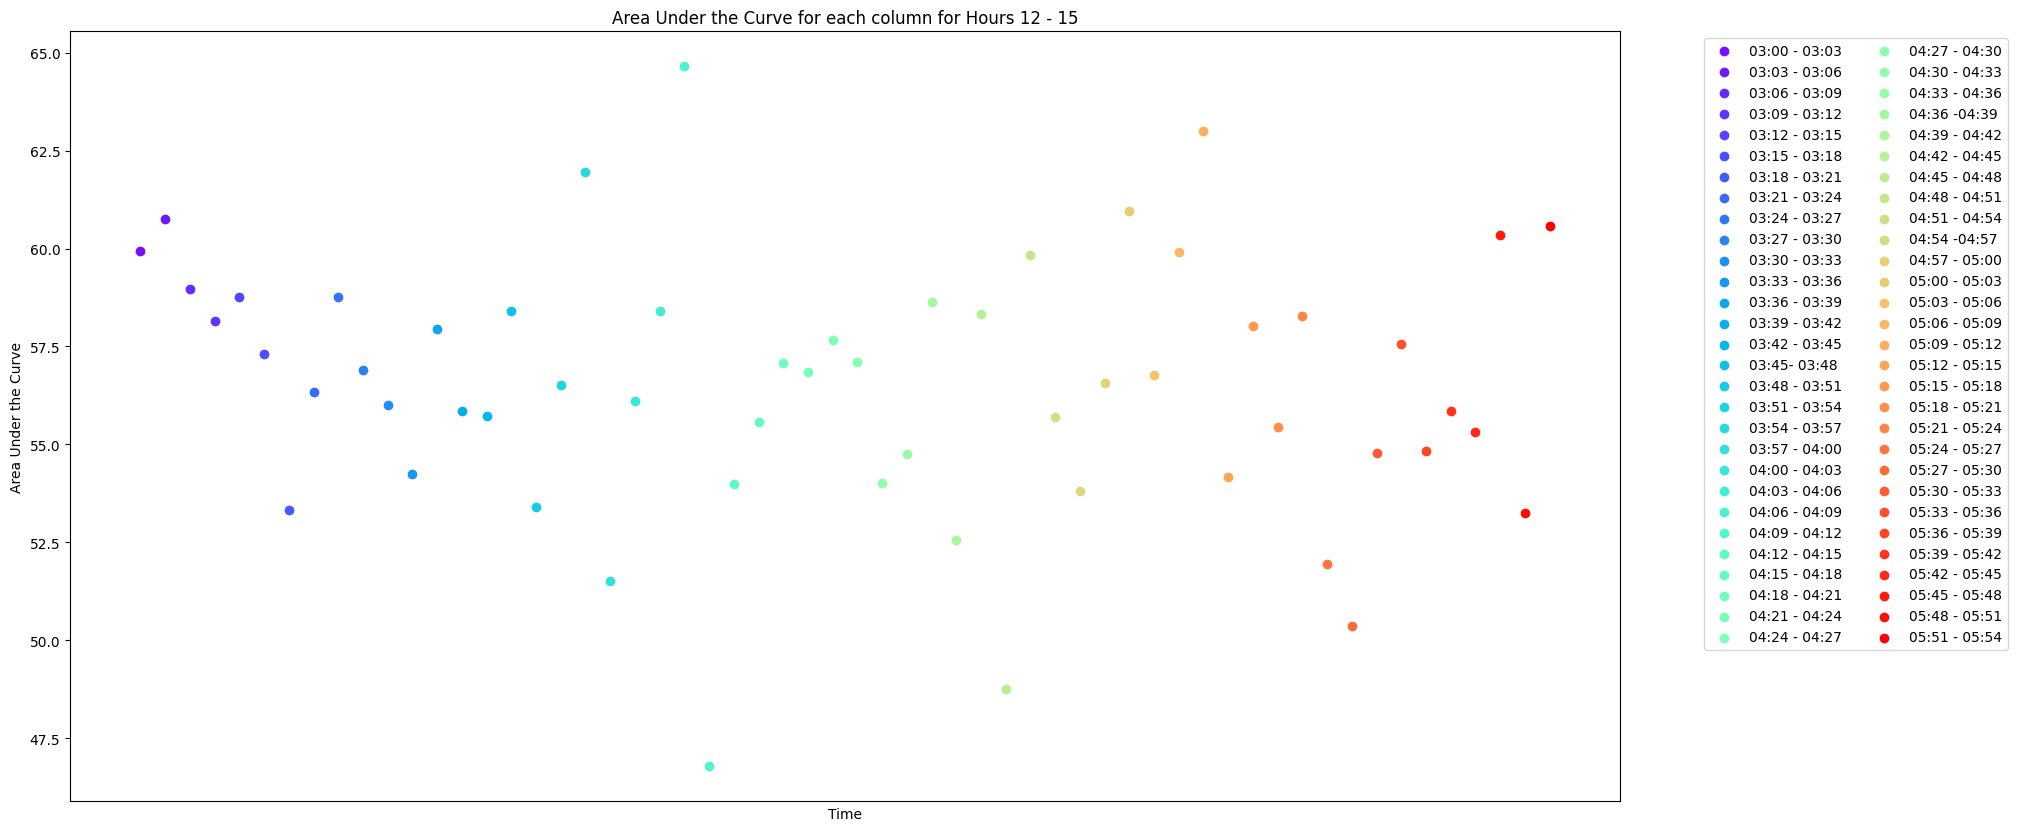

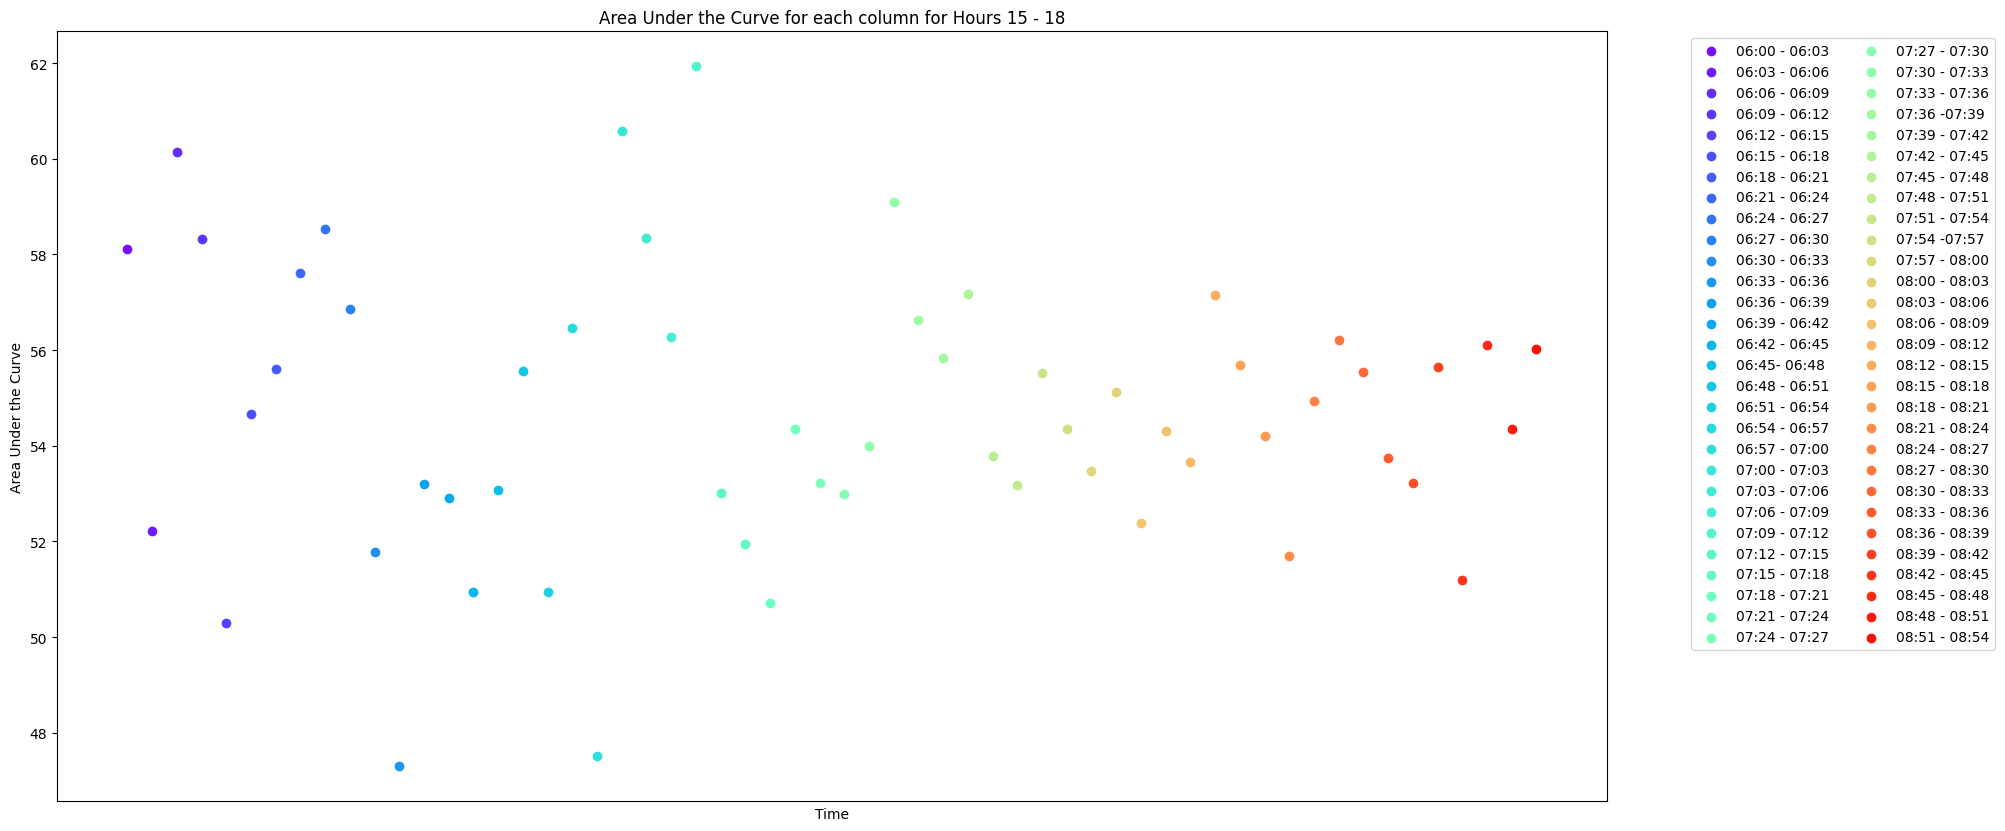

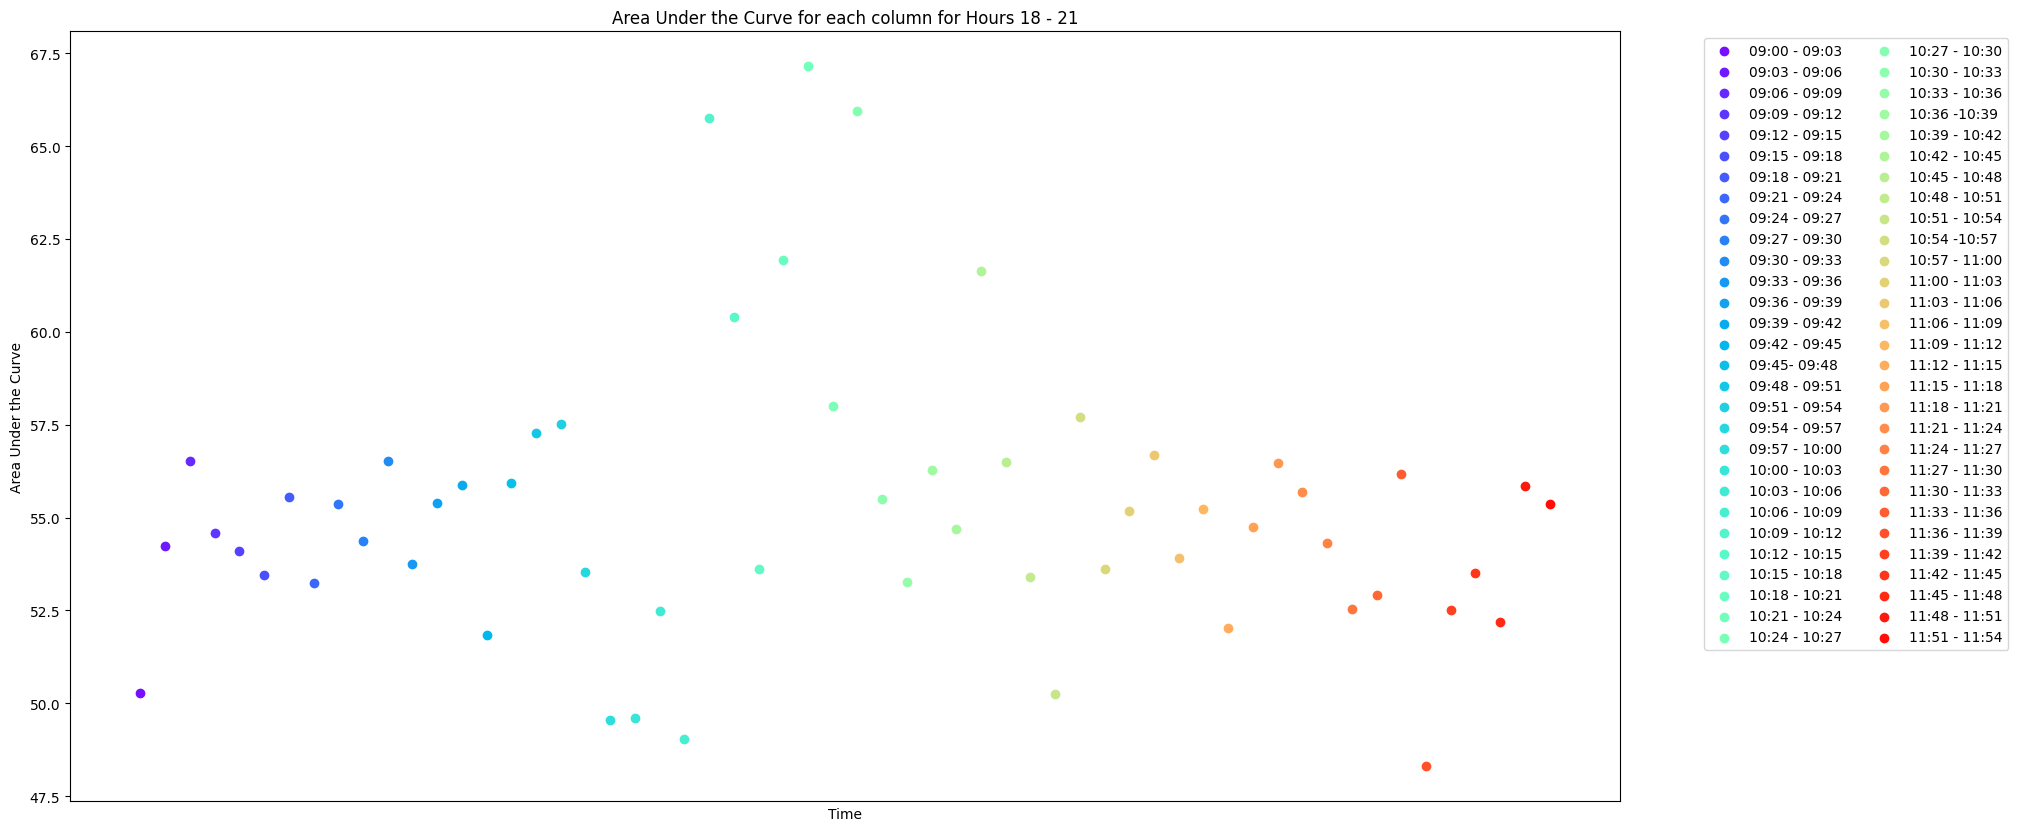

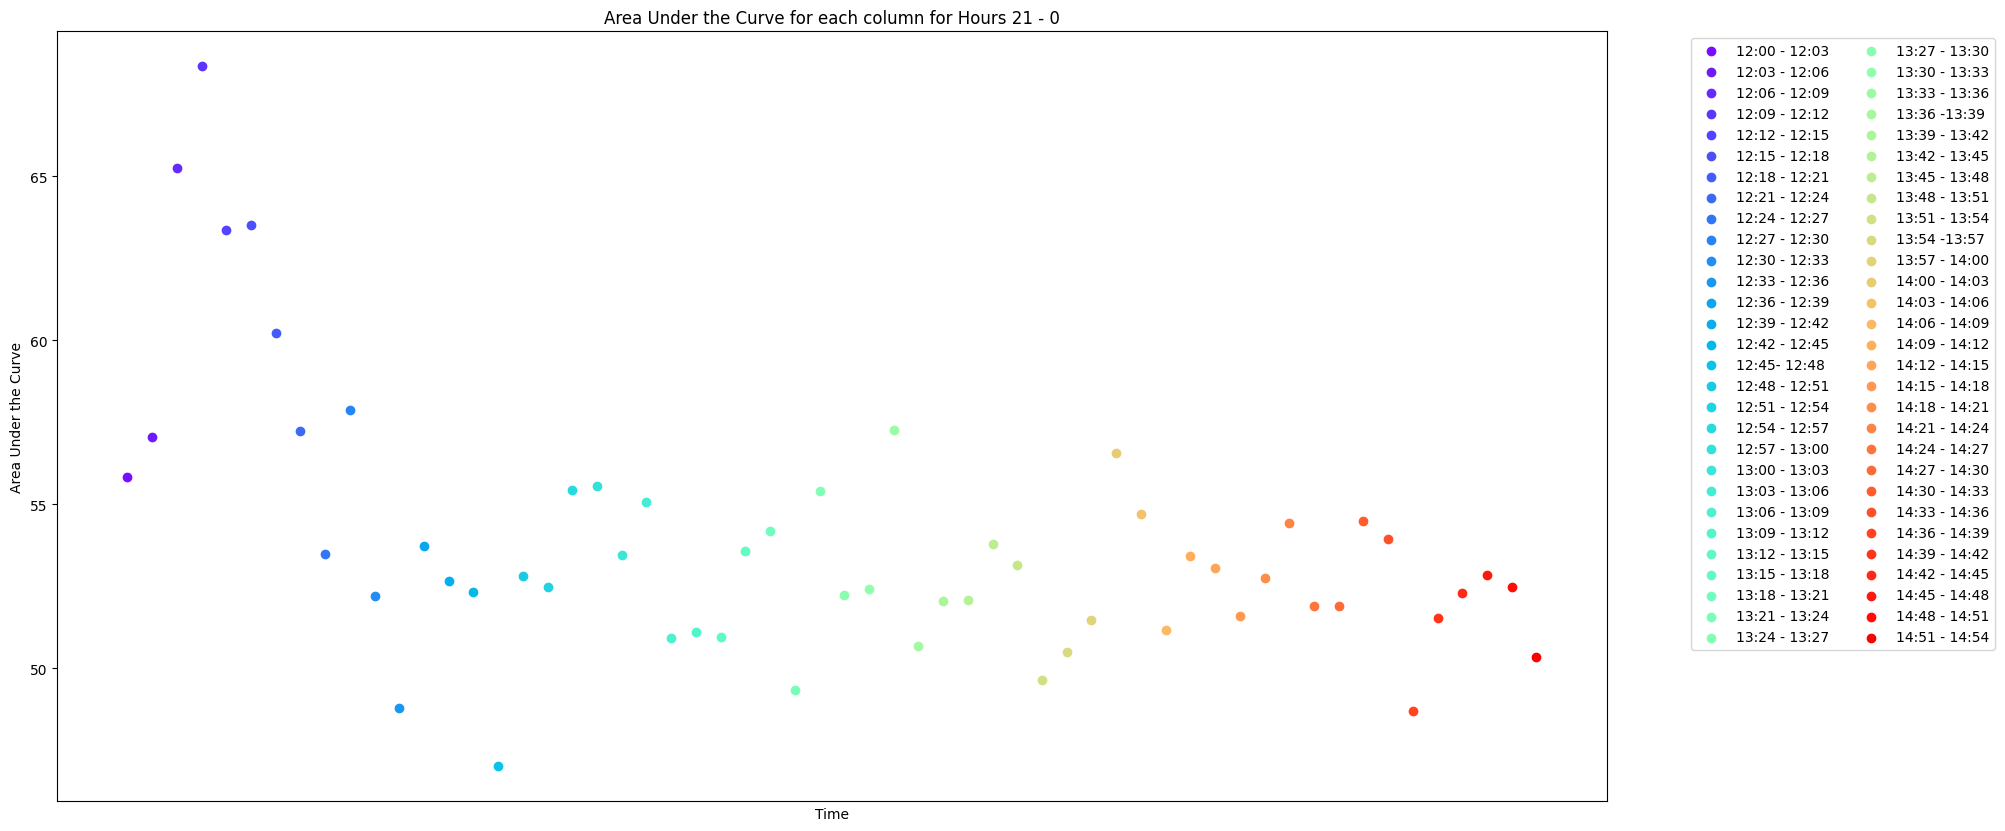

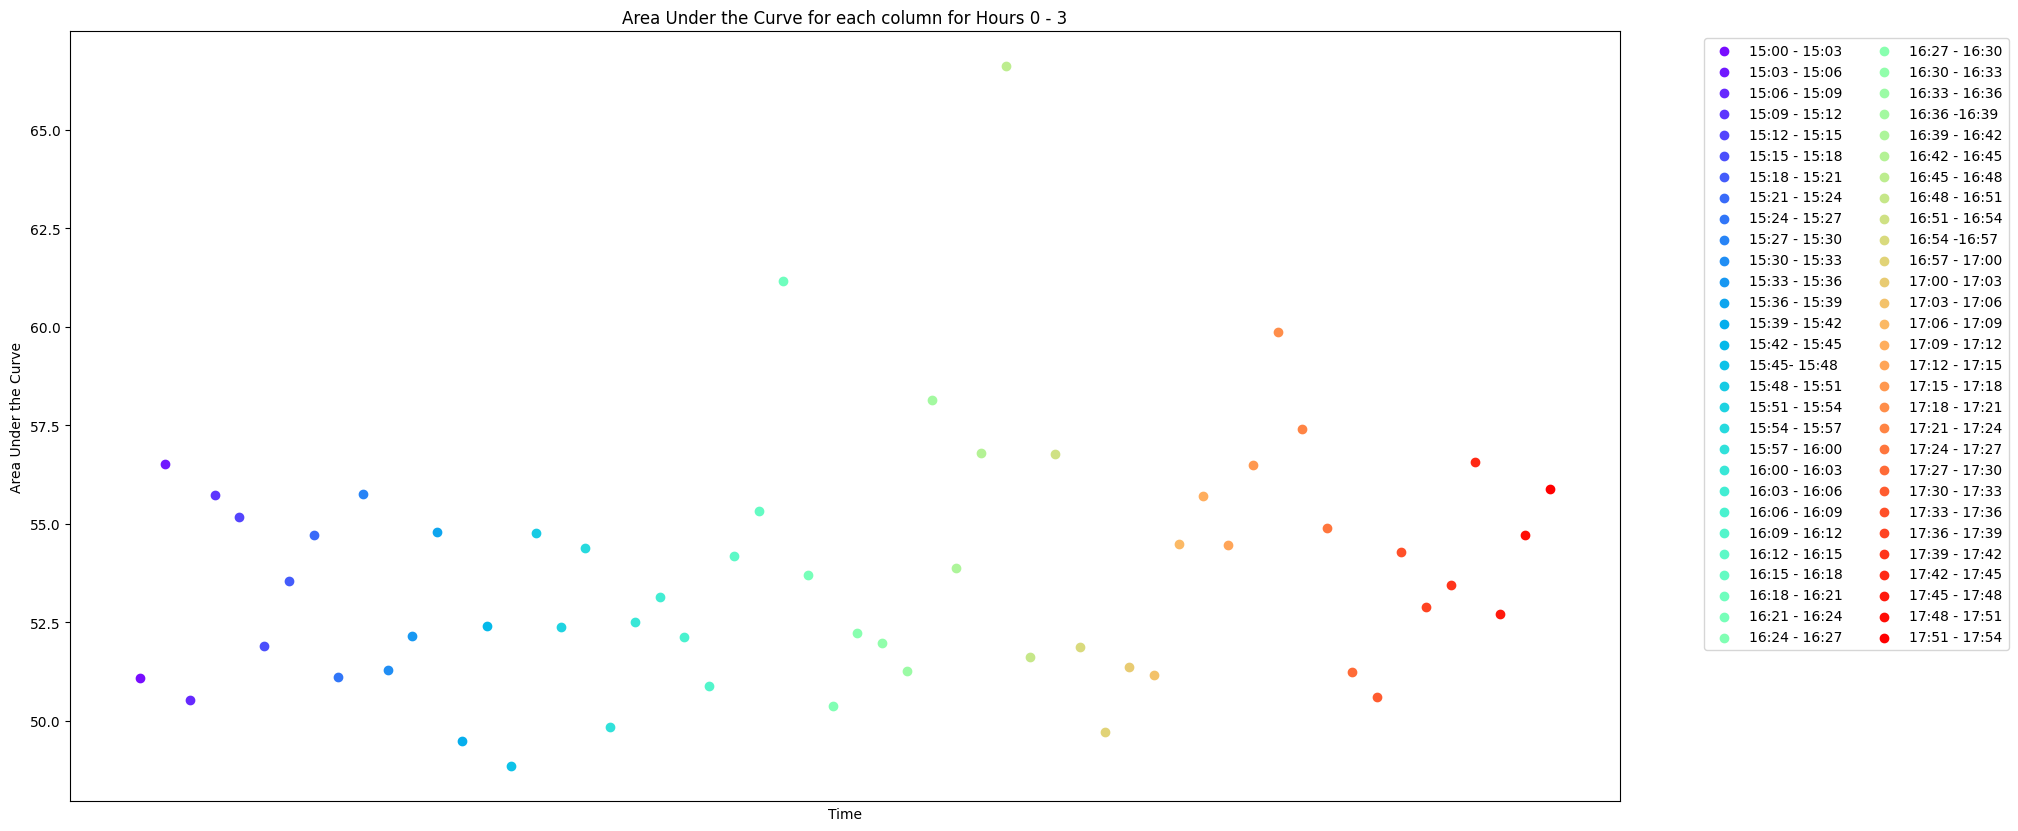

In [10]:
i = 3

for hour in hours:
    num_points = len(hour.columns[1:])
    colors = plt.cm.rainbow(np.linspace(0, 1, num_points))

    plt.figure(figsize=(20, 10))
    for column in hour.columns[1:59]:
        plt.scatter(column, np.trapz(hour[column], hour['Freq_Hz']), color = colors[hour.columns.get_loc(column)])

    plt.legend(hour.columns[1:59], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
    plt.xlabel('Time')
    plt.xticks([])
    plt.ylabel('Area Under the Curve')
    plt.title('Area Under the Curve for each column for Hours ' + str((i) % 24) + ' - ' + str((i + 3) % 24))
    plt.show()
    i += 3


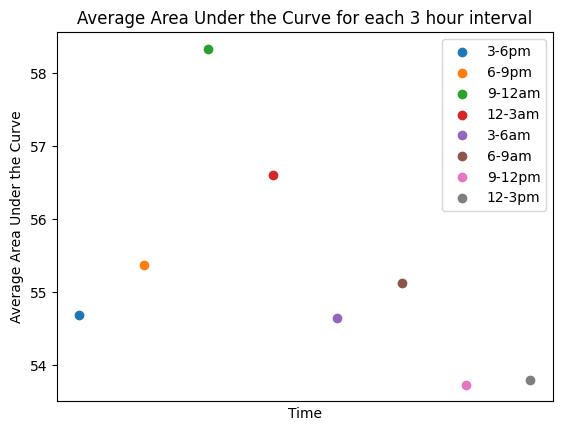

In [26]:
#average the area under the curve for all the hours and plot them
i = 3
curve = []
for hour in hours:
    plt.scatter(i, np.mean([np.trapz(hour[column], hour['Freq_Hz']) for column in hour.columns[1:]]))
    i += 3

plt.legend(['3-6pm', '6-9pm', '9-12am', '12-3am', '3-6am', '6-9am', '9-12pm', '12-3pm'])
plt.xlabel('Time')
plt.xticks([])
plt.ylabel('Average Area Under the Curve')
plt.title('Average Area Under the Curve for each 3 hour interval')
plt.show()